# Product classification using Textual data
Chaitanya Ashish Khot

Student Number – 22262858

School of Computing

Dublin City University

chaitanya.khot2@mail.dcu.ie


# Importing the necessary libraries


In [ ]:
# libraries
import io
import os
from datetime import datetime
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Matplotlib configuration
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 16 }
plt.rc('font', **font)

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install swifter
import re
from sklearn.preprocessing import FunctionTransformer
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import spacy
from spacy.lang.en import English
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 43.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.2 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=8d171fecea87a0e0c72aa8d6a62d0f59c87540ffe1fe1bbb3de75e124d139ae3
  Stored in directory: /root/.cache/pip/wheels/2b/5e/f2/3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
!pip install swifter
import swifter
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 29.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.8 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=e5f7e059a4b6f15a3e2a9520244dcfe064774dc009491576726092b37f0f1239
  Stored in directory: /root/.cache/pip/wheels/2b/5e/f2/3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter


# Connecting the Google drive to Colab and importing the Etsy train data

Mounting Google Drive to Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Setting the path to the data directory




In [ ]:
!ls /content/drive/MyDrive/ML-assignment/etsy_data

cleaned_parquet_train_df.parquet  data	parquet_train_df.parquet


Getting a list of all the parquet and TF record files in their respective directories




In [ ]:
parquet_filenames_train = !ls /content/drive/MyDrive/ML-assignment/etsy_data/data/parquet/train/*

In [ ]:
len(parquet_filenames_train)

278

In [ ]:
parquet_filenames_train[-3:]

['/content/drive/MyDrive/ML-assignment/etsy_data/data/parquet/train/part-00275-of-00278.parquet',
 '/content/drive/MyDrive/ML-assignment/etsy_data/data/parquet/train/part-00276-of-00278.parquet',
 '/content/drive/MyDrive/ML-assignment/etsy_data/data/parquet/train/part-00277-of-00278.parquet']

In [ ]:
parquet_filenames_test = !ls /content/drive/MyDrive/ML-assignment/etsy_data/data/parquet/test/*

In [ ]:
parquet_filenames_test[:3]

['/content/drive/MyDrive/ML-assignment/etsy_data/data/parquet/test/part-00000-of-00278.parquet',
 '/content/drive/MyDrive/ML-assignment/etsy_data/data/parquet/test/part-00001-of-00278.parquet',
 '/content/drive/MyDrive/ML-assignment/etsy_data/data/parquet/test/part-00002-of-00278.parquet']

# Exploratory Data Analysis on train data

In [ ]:
# Looping through each file and storing it's contents in an empty dataframe
parquet_train_dfs = []
for file in parquet_filenames_train:
    parquet_train_file = pq.read_table(file).to_pandas()
    parquet_train_dfs.append(parquet_train_file)

# Appending all the list of DataFrames into a single DataFrame
parquet_train_df = pd.concat(parquet_train_dfs, ignore_index=True)

In [ ]:
# Viewing Shape, First and Last Five Observations of the parquet train dataframe.
print(parquet_train_df.shape)
print(parquet_train_df.head())
print(parquet_train_df.tail())

(245485, 21)
   product_id                                              title  \
0   543497833  Full-face custom motorcycle helmet ,Motorcycle...   
1   718680498  Full-face predator motorcycle  helmet ,Custom ...   
2   718823736  Full-face custom motorcycle helmet ,Motorcycle...   
3   608840803  Full-face custom motorcycle helmet ,Motorcycle...   
4   804070543  Full-face predator motorcycle  helmet ,Custom ...   

                                         description  \
0  Helmetartthai from Thailand ( Since 2016) \n\n...   
1  Helmetartthai from Thailand ( Since 2016) \n\n...   
2  Helmetartthai from Thailand ( Since 2016) \n\n...   
3  Helmetartthai from Thailand ( Since 2016) \n\n...   
4  Helmetartthai from Thailand ( Since 2016) \n\n...   

                                                tags      type  room  \
0  predator helmet,motorcycle helmet,helmet,handm...  physical  None   
1  Predator helmet,Custom helmet,Handmade helme,P...  physical  None   
2  Predator helmet,Custom

In [ ]:
# Viewing Columns and its Types of the parquet train dataframe.
parquet_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245485 entries, 0 to 245484
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   product_id            245485 non-null  int64 
 1   title                 244545 non-null  object
 2   description           244545 non-null  object
 3   tags                  210575 non-null  object
 4   type                  244211 non-null  object
 5   room                  8727 non-null    object
 6   craft_type            32520 non-null   object
 7   recipient             13753 non-null   object
 8   material              20876 non-null   object
 9   occasion              53229 non-null   object
 10  holiday               41019 non-null   object
 11  art_subject           2773 non-null    object
 12  style                 17032 non-null   object
 13  shape                 2358 non-null    object
 14  pattern               10678 non-null   object
 15  bottom_category_i

In [ ]:
# Basic Descriptive Statistics of the parquet train dataframe.
parquet_train_df.describe()

,product_id,bottom_category_id,top_category_id,color_id
count,2.454850e+05,245485.000000,245485.000000,245485.000000
mean,1.016361e+09,3463.563990,6.956120,8.720500
std,3.105234e+08,3596.645965,3.560232,6.447211
min,2.400020e+05,1.000000,0.000000,0.000000
25%,7.841738e+08,994.000000,5.000000,2.000000
50%,1.092182e+09,1819.000000,7.000000,9.000000
75%,1.282032e+09,6360.000000,9.000000,16.000000
max,1.407470e+09,12431.000000,14.000000,19.000000


In [ ]:
# Null Check on current columns of the parquet train dataframe.
parquet_train_df.isnull().sum()

product_id                   0
title                      940
description                940
tags                     34910
type                      1274
room                    236758
craft_type              212965
recipient               231732
material                224609
occasion                192256
holiday                 204466
art_subject             242712
style                   228453
shape                   243127
pattern                 234807
bottom_category_id           0
bottom_category_text         0
top_category_id              0
top_category_text            0
color_id                     0
color_text                   0
dtype: int64

In [ ]:
# Percentage of all Missing Data Columns in the training dataframe
parquetNullPercent = (parquet_train_df.isnull().sum()/len(parquet_train_df)) * 100
parquetNullPercent

product_id               0.000000
title                    0.382915
description              0.382915
tags                    14.220828
type                     0.518973
room                    96.444997
craft_type              86.752755
recipient               94.397621
material                91.496018
occasion                78.316801
holiday                 83.290629
art_subject             98.870399
style                   93.061898
shape                   99.039453
pattern                 95.650243
bottom_category_id       0.000000
bottom_category_text     0.000000
top_category_id          0.000000
top_category_text        0.000000
color_id                 0.000000
color_text               0.000000
dtype: float64

In [ ]:
# Dropping irrelavant columns with high null values
parquet_train_df = parquet_train_df.drop(['room', 'craft_type', 'recipient', 'material', 'occasion', 'holiday', 'art_subject', 'style', 'shape', 'pattern'], axis = 1)

In [ ]:
# Percentage of all Missing Data Columns in the training dataframe after dropping irrelavant columns
parquetNullPercent = (parquet_train_df.isnull().sum()/len(parquet_train_df)) * 100
parquetNullPercent

product_id               0.000000
title                    0.382915
description              0.382915
tags                    14.220828
type                     0.518973
bottom_category_id       0.000000
bottom_category_text     0.000000
top_category_id          0.000000
top_category_text        0.000000
color_id                 0.000000
color_text               0.000000
dtype: float64

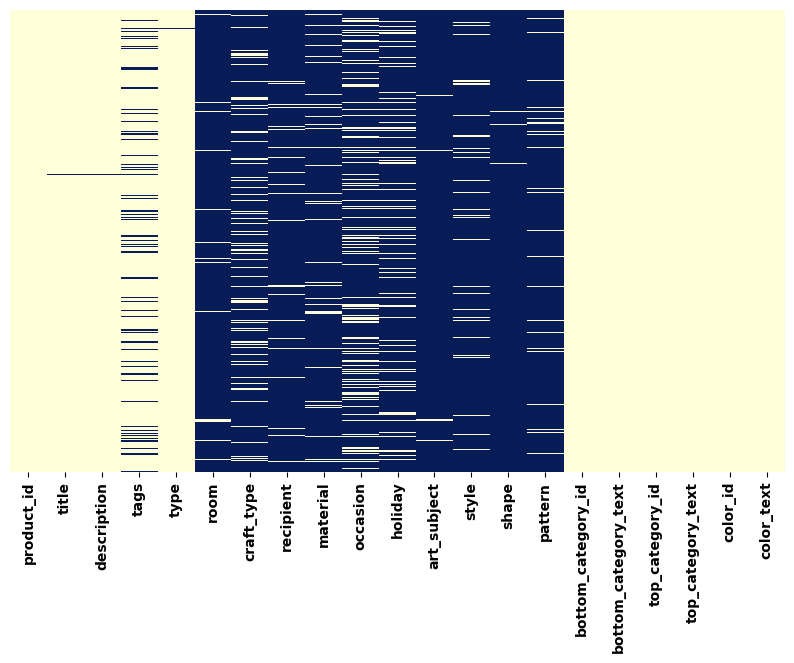

In [ ]:
# Plotting a missing data matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(parquet_train_df.isnull(), cmap="YlGnBu", cbar=False, yticklabels=False)
plt.xticks(fontsize=10)
plt.show()

<Axes: >

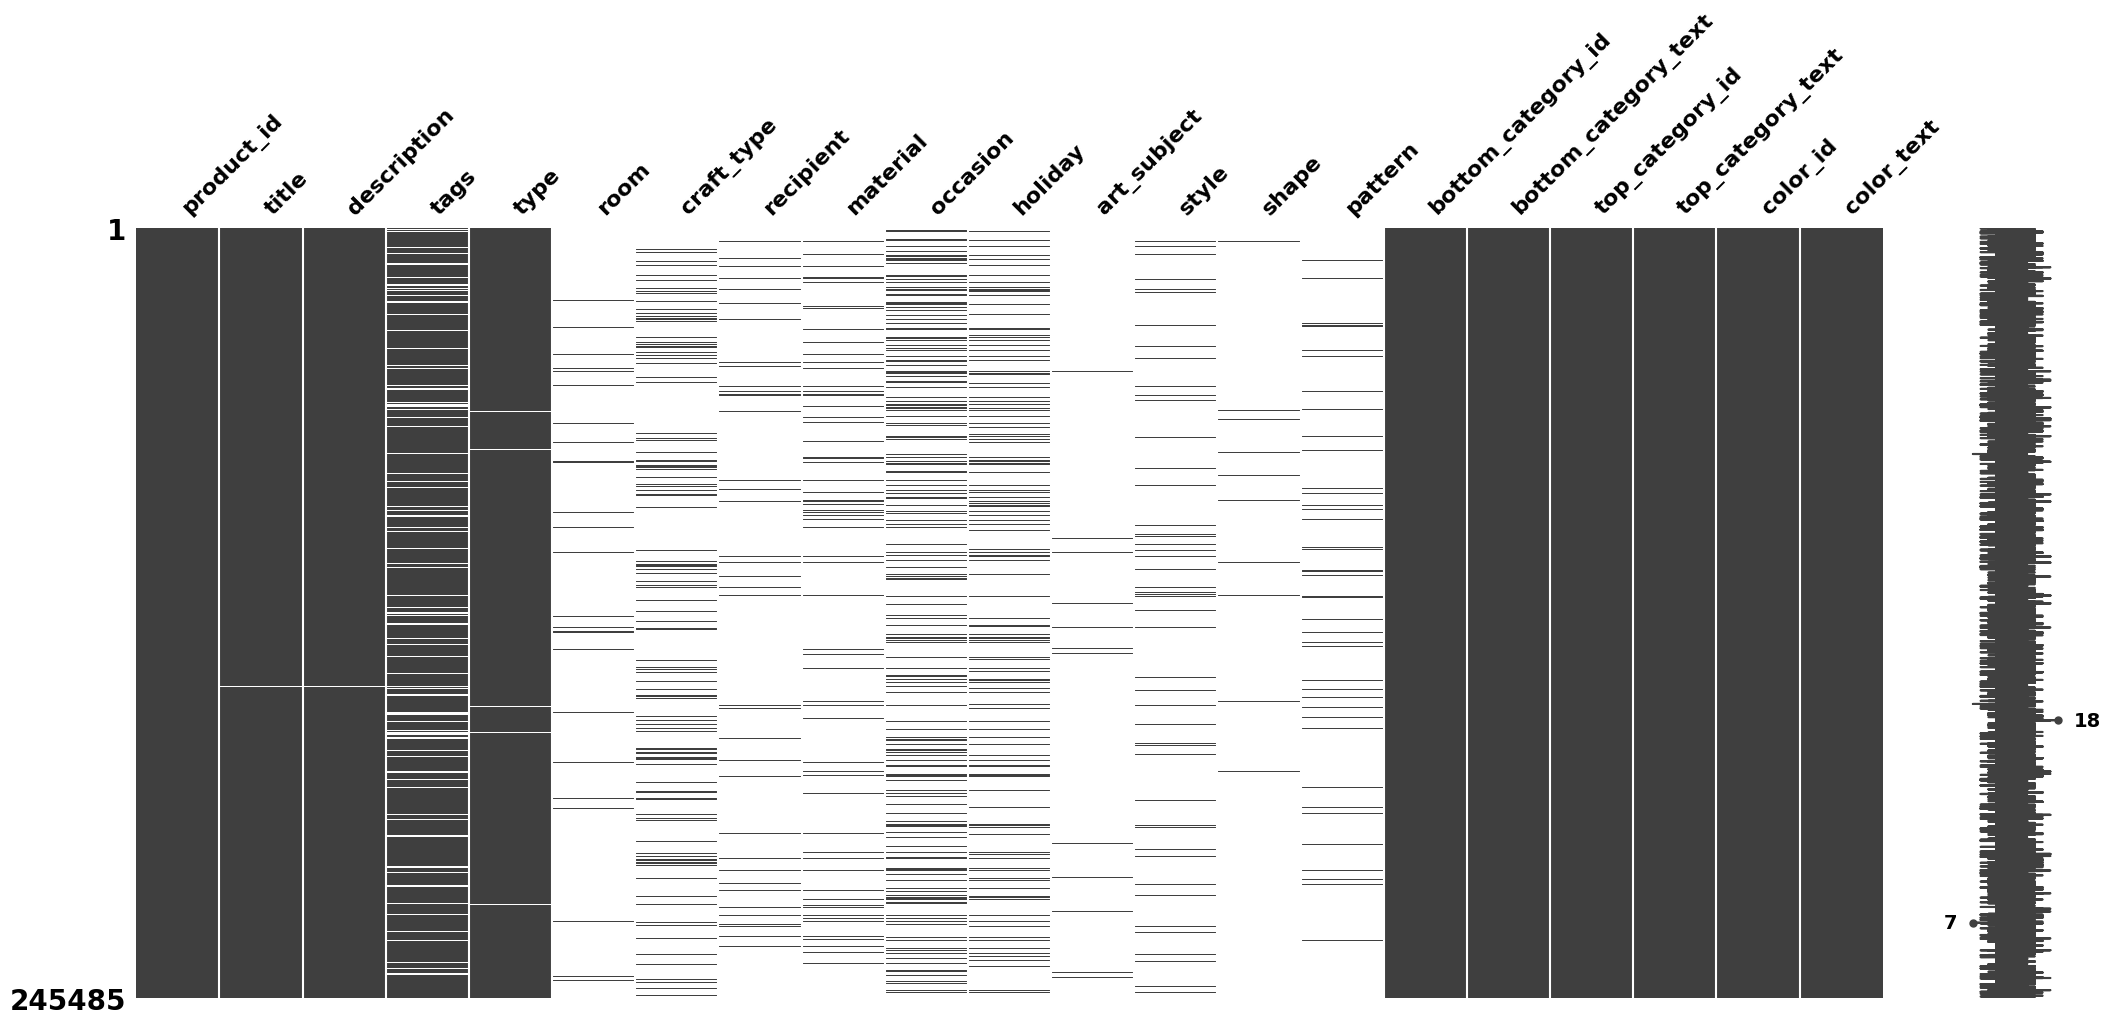

In [ ]:
# Plot missing data matrix
msno.matrix(parquet_train_df)

In [ ]:
parquet_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245485 entries, 0 to 245484
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   product_id            245485 non-null  int64 
 1   title                 244545 non-null  object
 2   description           244545 non-null  object
 3   tags                  210575 non-null  object
 4   type                  244211 non-null  object
 5   bottom_category_id    245485 non-null  int64 
 6   bottom_category_text  245485 non-null  object
 7   top_category_id       245485 non-null  int64 
 8   top_category_text     245485 non-null  object
 9   color_id              245485 non-null  int64 
 10  color_text            245485 non-null  object
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


We have around 35,000 of null data in tags column. We can impute the data using keywords from Title and Description column or we can impute blank tags in the column. However, tags will be an essential column that can be used for training the model. Hence, before imputing any values in the tags column, we need to be 100% sure that those values are right and it won't affect the results of our model negatively. After careful consideration of these factors, a decision was made to drop all the null values as we have over 200,000 rows for analysis

In [ ]:
# dropping the NaN values in the dataframe
parquet_train_df = parquet_train_df.dropna()

In [ ]:
print(parquet_train_df.shape)
print(parquet_train_df.info())
print(parquet_train_df.describe())
print(parquet_train_df.head())
print(parquet_train_df.isnull().sum())

(209932, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 209932 entries, 0 to 245484
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   product_id            209932 non-null  int64 
 1   title                 209932 non-null  object
 2   description           209932 non-null  object
 3   tags                  209932 non-null  object
 4   type                  209932 non-null  object
 5   bottom_category_id    209932 non-null  int64 
 6   bottom_category_text  209932 non-null  object
 7   top_category_id       209932 non-null  int64 
 8   top_category_text     209932 non-null  object
 9   color_id              209932 non-null  int64 
 10  color_text            209932 non-null  object
dtypes: int64(4), object(7)
memory usage: 19.2+ MB
None
         product_id  bottom_category_id  top_category_id       color_id
count  2.099320e+05       209932.000000    209932.000000  209932.000000
mean   1.0062

## Preprocessing on train data


In [ ]:
# Define text preprocessing functions that will be called for different columns
def lowercase_text(text):
    return text.lower()

def remove_special_characters(text):
    return re.sub(r'[^\w\s]', ' ', text)

def remove_urls(text):
    return re.sub(r'http\S+', ' ', text)

def remove_emojis(text):
    return text.encode("ascii", "ignore").decode("utf-8")

stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    return ' '.join(word for word in text.split() if word not in stop_words)

def tokenize_text(text):
    return word_tokenize(text)

def lemmatize_tokens(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in text]

##### Preprocessing Description column


In [ ]:
# Converting all the text to lowercase
parquet_train_df['description_processed'] = parquet_train_df['description'].swifter.apply(lowercase_text)

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Removing the new line command ("\n")
parquet_train_df['description_processed'] = parquet_train_df['description_processed'].str.replace(r'\\n', ' ')

In [ ]:
# Removing the special characters from the text
parquet_train_df['description_processed'] = parquet_train_df['description_processed'].swifter.apply(remove_special_characters)

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Removing urls from the text
parquet_train_df['description_processed'] = parquet_train_df['description_processed'].swifter.apply(remove_urls)

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Removing emojis from the text
parquet_train_df['description_processed'] = parquet_train_df['description_processed'].swifter.apply(remove_emojis)

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Removing stop words from the text
parquet_train_df['description_processed'] = parquet_train_df['description_processed'].swifter.apply(remove_stop_words)

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Removing digits (0-9) from the text
parquet_train_df['description_processed'] = parquet_train_df['description_processed'].swifter.apply(lambda x: re.sub(r'\d+', ' ', x))

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Tokenizing the text
parquet_train_df['description_processed'] = parquet_train_df['description_processed'].swifter.apply(lambda x: tokenize_text(x))

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Lemmatizing the text
parquet_train_df['description_processed'] = parquet_train_df['description_processed'].swifter.apply(lemmatize_tokens)

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

##### Preprocessing Title column

In [ ]:
# Converting all the titles to lowercase
parquet_train_df['title_processed'] = parquet_train_df['title'].swifter.apply(lowercase_text)

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Removing special characters from the title
parquet_train_df['title_processed'] = parquet_train_df['title_processed'].swifter.apply(remove_special_characters)

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Removing urls from the title
parquet_train_df['title_processed'] = parquet_train_df['title_processed'].swifter.apply(remove_urls)

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Removing emojis from the title
parquet_train_df['title_processed'] = parquet_train_df['title_processed'].swifter.apply(remove_emojis)

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Removing stop words from the title
parquet_train_df['title_processed'] = parquet_train_df['title_processed'].swifter.apply(remove_stop_words)

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Removing digits (0-9) from the title
parquet_train_df['title_processed'] = parquet_train_df['title_processed'].swifter.apply(lambda x: re.sub(r'\d+', ' ', x))

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Tokenizing the title
parquet_train_df['title_processed'] = parquet_train_df['title_processed'].swifter.apply(lambda x: tokenize_text(x))

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Lemmatizing the title
parquet_train_df['title_processed'] = parquet_train_df['title_processed'].swifter.apply(lemmatize_tokens)

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

##### Preprocessing Tags column

In [ ]:
# Converting all the tags to lowercase
parquet_train_df['tags_processed'] = parquet_train_df['tags'].swifter.apply(lowercase_text)

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Removing special characters from the tags
parquet_train_df['tags_processed'] = parquet_train_df['tags_processed'].swifter.apply(remove_special_characters)

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Removing urls from the tags
parquet_train_df['tags_processed'] = parquet_train_df['tags_processed'].swifter.apply(remove_urls)

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Removing emojis from the tags
parquet_train_df['tags_processed'] = parquet_train_df['tags_processed'].swifter.apply(remove_emojis)

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Removing the stop words from the tags
parquet_train_df['tags_processed'] = parquet_train_df['tags_processed'].swifter.apply(remove_stop_words)

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Removing the digits (0-9) from the tags
parquet_train_df['tags_processed'] = parquet_train_df['tags_processed'].swifter.apply(lambda x: re.sub(r'\d+', ' ', x))

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Tokenizing the tags
parquet_train_df['tags_processed'] = parquet_train_df['tags_processed'].swifter.apply(lambda x: tokenize_text(x))

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
# Lemmatizing the tags
parquet_train_df['tags_processed'] = parquet_train_df['tags_processed'].swifter.apply(lemmatize_tokens)

Pandas Apply:   0%|          | 0/209932 [00:00<?, ?it/s]

In [ ]:
parquet_train_df.head()

,product_id,title,description,tags,type,bottom_category_id,bottom_category_text,top_category_id,top_category_text,color_id,color_text,description_normalized,description_processed,title_processed,tags_processed
0,543497833,"Full-face custom motorcycle helmet ,Motorcycle...",Helmetartthai from Thailand ( Since 2016) \n\n...,"predator helmet,motorcycle helmet,helmet,handm...",physical,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,12,purple,helmetartthai thailand since name phayong kh...,"[helmetartthai, thailand, since, name, phayong...","[full, face, custom, motorcycle, helmet, motor...","[predator, helmet, motorcycle, helmet, helmet,..."
1,718680498,"Full-face predator motorcycle helmet ,Custom ...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Predator helmet,Custom helmet,Handmade helme,P...",physical,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,1,black,helmetartthai thailand since name phayong kh...,"[helmetartthai, thailand, since, name, phayong...","[full, face, predator, motorcycle, helmet, cus...","[predator, helmet, custom, helmet, handmade, h..."
2,718823736,"Full-face custom motorcycle helmet ,Motorcycle...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Predator helmet,Custom helmet,Handmade helmet,...",physical,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,2,blue,helmetartthai thailand since name phayong kh...,"[helmetartthai, thailand, since, name, phayong...","[full, face, custom, motorcycle, helmet, motor...","[predator, helmet, custom, helmet, handmade, h..."
3,608840803,"Full-face custom motorcycle helmet ,Motorcycle...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Predator helmet,Custom helmet,Handmade helmet,...",physical,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,4,brown,helmetartthai thailand since name phayong kh...,"[helmetartthai, thailand, since, name, phayong...","[full, face, custom, motorcycle, helmet, motor...","[predator, helmet, custom, helmet, handmade, h..."
4,804070543,"Full-face predator motorcycle helmet ,Custom ...",Helmetartthai from Thailand ( Since 2016) \n\n...,"Custom helmet,Handmade helmet,Predator helmet,...",physical,2804,accessories.hats_and_caps.helmets.sports_helme...,0,accessories,1,black,helmetartthai thailand since name phayong kh...,"[helmetartthai, thailand, since, name, phayong...","[full, face, predator, motorcycle, helmet, cus...","[custom, helmet, handmade, helmet, predator, h..."


In [ ]:
# exporting this processed train file as a backup
parquet_train_df.to_parquet('processed_parquet_train_df.parquet')

# Multinomial Naive Bayes

In [ ]:
pred_bottom_train = []
pred_top_train = []
pred_color_train = []
true_bottom_train = []
true_top_train = []
true_color_train = []
pred_bottom_test = []
pred_top_test = []
pred_color_test = []
true_bottom_test = []
true_top_test = []
true_color_test = []
batch_size = 10000

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Iterate over data in batches
for i in range(0, len(parquet_train_df), batch_size):

    # Get batch data
    batch = parquet_train_df.iloc[i:i+batch_size]

    # Fit and transform the text data
    X = vectorizer.fit_transform(batch["title_processed"].swifter.apply(lambda word: ' '.join(word)))
    #X = vectorizer.fit_transform(batch["title_processed"].astype(str) + " " + batch["description_processed"].astype(str))

    # Standardize the data
    X = scaler.fit_transform(X.toarray())

    # Split the data into training and testing sets
    X_train, X_test, y_train_bottom, y_test_bottom, y_train_top, y_test_top, y_train_color, y_test_color = train_test_split(X, batch["bottom_category_id"], batch["top_category_id"], batch["color_id"], test_size=0.2, random_state=42)

    # Train the model on the training set
    clf_bottom = MultinomialNB()
    clf_bottom.fit(X_train, y_train_bottom)

    clf_top = MultinomialNB()
    clf_top.fit(X_train, y_train_top)

    clf_color = MultinomialNB()
    clf_color.fit(X_train, y_train_color)

    # Predict on the training set for the current batch
    y_pred_bottom_train = clf_bottom.predict(X_train)
    y_pred_top_train = clf_top.predict(X_train)
    y_pred_color_train = clf_color.predict(X_train)

    # Append the predicted values to the corresponding list for the training set
    pred_bottom_train.append(y_pred_bottom_train)
    pred_top_train.append(y_pred_top_train)
    pred_color_train.append(y_pred_color_train)

    # Append the true values to the corresponding list for the training set
    true_bottom_train.append(y_train_bottom)
    true_top_train.append(y_train_top)
    true_color_train.append(y_train_color)

    # Predict on the testing set for the current batch
    y_pred_bottom_test = clf_bottom.predict(X_test)
    y_pred_top_test = clf_top.predict(X_test)
    y_pred_color_test = clf_color.predict(X_test)

    # Append the predicted values to the corresponding list for the testing set
    pred_bottom_test.append(y_pred_bottom_test)
    pred_top_test.append(y_pred_top_test)
    pred_color_test.append(y_pred_color_test)

    # Append the true values to the corresponding list for the testing set
    true_bottom_test.append(y_test_bottom)
    true_top_test.append(y_test_top)
    true_color_test.append(y_test_color)

    print(f"Batch {i//batch_size + 1} - Bottom Category Accuracy (Train):", accuracy_score(y_train_bottom, y_pred_bottom_train))

    print(f"Batch {i//batch_size + 1} - Top Category Accuracy (Train):", accuracy_score(y_train_top, y_pred_top_train))

    print(f"Batch {i//batch_size + 1} - Color Accuracy (Train):", accuracy_score(y_train_color, y_pred_color_train))


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 1 - Bottom Category Accuracy (Train): 0.957125
Batch 1 - Top Category Accuracy (Train): 0.9345
Batch 1 - Color Accuracy (Train): 0.652125


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 2 - Bottom Category Accuracy (Train): 0.96525
Batch 2 - Top Category Accuracy (Train): 0.9335
Batch 2 - Color Accuracy (Train): 0.6615


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 3 - Bottom Category Accuracy (Train): 0.963625
Batch 3 - Top Category Accuracy (Train): 0.9275
Batch 3 - Color Accuracy (Train): 0.66575


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 4 - Bottom Category Accuracy (Train): 0.9575
Batch 4 - Top Category Accuracy (Train): 0.92575
Batch 4 - Color Accuracy (Train): 0.673125


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 5 - Bottom Category Accuracy (Train): 0.9645
Batch 5 - Top Category Accuracy (Train): 0.936
Batch 5 - Color Accuracy (Train): 0.665125


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 6 - Bottom Category Accuracy (Train): 0.95825
Batch 6 - Top Category Accuracy (Train): 0.91475
Batch 6 - Color Accuracy (Train): 0.68625


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 7 - Bottom Category Accuracy (Train): 0.969375
Batch 7 - Top Category Accuracy (Train): 0.931
Batch 7 - Color Accuracy (Train): 0.664125


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 8 - Bottom Category Accuracy (Train): 0.96225
Batch 8 - Top Category Accuracy (Train): 0.93125
Batch 8 - Color Accuracy (Train): 0.686


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 9 - Bottom Category Accuracy (Train): 0.97375
Batch 9 - Top Category Accuracy (Train): 0.94125
Batch 9 - Color Accuracy (Train): 0.67075


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 10 - Bottom Category Accuracy (Train): 0.961
Batch 10 - Top Category Accuracy (Train): 0.921125
Batch 10 - Color Accuracy (Train): 0.669


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 11 - Bottom Category Accuracy (Train): 0.959625
Batch 11 - Top Category Accuracy (Train): 0.926875
Batch 11 - Color Accuracy (Train): 0.684


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 12 - Bottom Category Accuracy (Train): 0.964125
Batch 12 - Top Category Accuracy (Train): 0.9305
Batch 12 - Color Accuracy (Train): 0.672625


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 13 - Bottom Category Accuracy (Train): 0.958625
Batch 13 - Top Category Accuracy (Train): 0.934625
Batch 13 - Color Accuracy (Train): 0.6745


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 14 - Bottom Category Accuracy (Train): 0.96375
Batch 14 - Top Category Accuracy (Train): 0.93975
Batch 14 - Color Accuracy (Train): 0.665625


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 15 - Bottom Category Accuracy (Train): 0.96475
Batch 15 - Top Category Accuracy (Train): 0.9415
Batch 15 - Color Accuracy (Train): 0.698625


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 16 - Bottom Category Accuracy (Train): 0.96725
Batch 16 - Top Category Accuracy (Train): 0.93575
Batch 16 - Color Accuracy (Train): 0.65925


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 17 - Bottom Category Accuracy (Train): 0.965625
Batch 17 - Top Category Accuracy (Train): 0.9335
Batch 17 - Color Accuracy (Train): 0.684625


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 18 - Bottom Category Accuracy (Train): 0.970375
Batch 18 - Top Category Accuracy (Train): 0.929625
Batch 18 - Color Accuracy (Train): 0.669375


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 19 - Bottom Category Accuracy (Train): 0.967
Batch 19 - Top Category Accuracy (Train): 0.937375
Batch 19 - Color Accuracy (Train): 0.68375


Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Batch 20 - Bottom Category Accuracy (Train): 0.960375
Batch 20 - Top Category Accuracy (Train): 0.93725
Batch 20 - Color Accuracy (Train): 0.659375


Pandas Apply:   0%|          | 0/9932 [00:00<?, ?it/s]

Batch 21 - Bottom Category Accuracy (Train): 0.965764631843927
Batch 21 - Top Category Accuracy (Train): 0.9238514789175583
Batch 21 - Color Accuracy (Train): 0.669100062932662


## MNB Results:

MNB Batch of 10k over title:

In [ ]:
# Concatenate all the predictions and the true labels for the testing set
pred_bottom_test = np.concatenate(pred_bottom_test)
pred_top_test = np.concatenate(pred_top_test)
pred_color_test = np.concatenate(pred_color_test)
true_bottom_test = np.concatenate(true_bottom_test)
true_top_test = np.concatenate(true_top_test)
true_color_test = np.concatenate(true_color_test)

# Calculate the weighted F1 score for each category on the testing set
weighted_f1_bottom_test = f1_score(true_bottom_test, pred_bottom_test, average='weighted')
weighted_f1_top_test = f1_score(true_top_test, pred_top_test, average='weighted')
weighted_f1_color_test = f1_score(true_color_test, pred_color_test, average='weighted')

# Concatenate all the predictions and the true labels for the training set
pred_bottom_train = np.concatenate(pred_bottom_train)
pred_top_train = np.concatenate(pred_top_train)
pred_color_train = np.concatenate(pred_color_train)
true_bottom_train = np.concatenate(true_bottom_train)
true_top_train = np.concatenate(true_top_train)
true_color_train = np.concatenate(true_color_train)

# Calculate the weighted F1 score for each category on the training set
weighted_f1_bottom_train = f1_score(true_bottom_train, pred_bottom_train, average='weighted')
weighted_f1_top_train = f1_score(true_top_train, pred_top_train, average='weighted')
weighted_f1_color_train = f1_score(true_color_train, pred_color_train, average='weighted')

print("Weighted F1 Score - Bottom Category (Training Data):", weighted_f1_bottom_train)
print("Weighted F1 Score - Bottom Category (Testing Data):", weighted_f1_bottom_test)

print("Weighted F1 Score - Top Category (Training Data):", weighted_f1_top_train)
print("Weighted F1 Score - Top Category (Testing Data):", weighted_f1_top_test)

print("Weighted F1 Score - Color (Training Data):", weighted_f1_color_train)
print("Weighted F1 Score - Color (Testing Data):", weighted_f1_color_test)

Weighted F1 Score - Bottom Category (Training Data): 0.9632165830221981
Weighted F1 Score - Bottom Category (Testing Data): 0.7874719995742469
Weighted F1 Score - Top Category (Training Data): 0.9309886011765122
Weighted F1 Score - Top Category (Testing Data): 0.8316634318869316
Weighted F1 Score - Color (Training Data): 0.6557213379773773
Weighted F1 Score - Color (Testing Data): 0.3393340002801054


MNB Batch of 15k over title:

In [ ]:
# Concatenate all the predictions and the true labels for the testing set
pred_bottom_test = np.concatenate(pred_bottom_test)
pred_top_test = np.concatenate(pred_top_test)
pred_color_test = np.concatenate(pred_color_test)
true_bottom_test = np.concatenate(true_bottom_test)
true_top_test = np.concatenate(true_top_test)
true_color_test = np.concatenate(true_color_test)

# Calculate the weighted F1 score for each category on the testing set
weighted_f1_bottom_test = f1_score(true_bottom_test, pred_bottom_test, average='weighted')
weighted_f1_top_test = f1_score(true_top_test, pred_top_test, average='weighted')
weighted_f1_color_test = f1_score(true_color_test, pred_color_test, average='weighted')

# Concatenate all the predictions and the true labels for the training set
pred_bottom_train = np.concatenate(pred_bottom_train)
pred_top_train = np.concatenate(pred_top_train)
pred_color_train = np.concatenate(pred_color_train)
true_bottom_train = np.concatenate(true_bottom_train)
true_top_train = np.concatenate(true_top_train)
true_color_train = np.concatenate(true_color_train)

# Calculate the weighted F1 score for each category on the training set
weighted_f1_bottom_train = f1_score(true_bottom_train, pred_bottom_train, average='weighted')
weighted_f1_top_train = f1_score(true_top_train, pred_top_train, average='weighted')
weighted_f1_color_train = f1_score(true_color_train, pred_color_train, average='weighted')

print("Weighted F1 Score - Bottom Category (Training Data):", weighted_f1_bottom_train)
print("Weighted F1 Score - Bottom Category (Testing Data):", weighted_f1_bottom_test)

print("Weighted F1 Score - Top Category (Training Data):", weighted_f1_top_train)
print("Weighted F1 Score - Top Category (Testing Data):", weighted_f1_top_test)

print("Weighted F1 Score - Color (Training Data):", weighted_f1_color_train)
print("Weighted F1 Score - Color (Testing Data):", weighted_f1_color_test)

Weighted F1 Score - Bottom Category (Training Data): 0.949767138840843
Weighted F1 Score - Bottom Category (Testing Data): 0.7556842820785082
Weighted F1 Score - Top Category (Training Data): 0.907625613572481
Weighted F1 Score - Top Category (Testing Data): 0.8082462225435734
Weighted F1 Score - Color (Training Data): 0.616373425598843
Weighted F1 Score - Color (Testing Data): 0.3334435421865337


###MNB Batch of 20k over title (used as our final result for MNB):

In [ ]:
# Concatenate all the predictions and the true labels for the testing set
pred_bottom_test = np.concatenate(pred_bottom_test)
pred_top_test = np.concatenate(pred_top_test)
pred_color_test = np.concatenate(pred_color_test)
true_bottom_test = np.concatenate(true_bottom_test)
true_top_test = np.concatenate(true_top_test)
true_color_test = np.concatenate(true_color_test)

# Calculate the weighted F1 score for each category on the testing set
weighted_f1_bottom_test = f1_score(true_bottom_test, pred_bottom_test, average='weighted')
weighted_f1_top_test = f1_score(true_top_test, pred_top_test, average='weighted')
weighted_f1_color_test = f1_score(true_color_test, pred_color_test, average='weighted')

# Concatenate all the predictions and the true labels for the training set
pred_bottom_train = np.concatenate(pred_bottom_train)
pred_top_train = np.concatenate(pred_top_train)
pred_color_train = np.concatenate(pred_color_train)
true_bottom_train = np.concatenate(true_bottom_train)
true_top_train = np.concatenate(true_top_train)
true_color_train = np.concatenate(true_color_train)

# Calculate the weighted F1 score for each category on the training set
weighted_f1_bottom_train = f1_score(true_bottom_train, pred_bottom_train, average='weighted')
weighted_f1_top_train = f1_score(true_top_train, pred_top_train, average='weighted')
weighted_f1_color_train = f1_score(true_color_train, pred_color_train, average='weighted')

print("Weighted F1 Score - Bottom Category (Training Data):", weighted_f1_bottom_train)
print("Weighted F1 Score - Bottom Category (Testing Data):", weighted_f1_bottom_test)

print("Weighted F1 Score - Top Category (Training Data):", weighted_f1_top_train)
print("Weighted F1 Score - Top Category (Testing Data):", weighted_f1_top_test)

print("Weighted F1 Score - Color (Training Data):", weighted_f1_color_train)
print("Weighted F1 Score - Color (Testing Data):", weighted_f1_color_test)

Weighted F1 Score - Bottom Category (Training Data): 0.939354230565138
Weighted F1 Score - Bottom Category (Testing Data): 0.7362021039390815
Weighted F1 Score - Top Category (Training Data): 0.8933978759880297
Weighted F1 Score - Top Category (Testing Data): 0.7977925560839981
Weighted F1 Score - Color (Training Data): 0.5948890808226602
Weighted F1 Score - Color (Testing Data): 0.3350576732584622


MNB Batch of 10k over desc:

In [ ]:
# Concatenate all the predictions and the true labels for the testing set
pred_bottom_test = np.concatenate(pred_bottom_test)
pred_top_test = np.concatenate(pred_top_test)
pred_color_test = np.concatenate(pred_color_test)
true_bottom_test = np.concatenate(true_bottom_test)
true_top_test = np.concatenate(true_top_test)
true_color_test = np.concatenate(true_color_test)

# Calculate the weighted F1 score for each category on the testing set
weighted_f1_bottom_test = f1_score(true_bottom_test, pred_bottom_test, average='weighted')
weighted_f1_top_test = f1_score(true_top_test, pred_top_test, average='weighted')
weighted_f1_color_test = f1_score(true_color_test, pred_color_test, average='weighted')

# Concatenate all the predictions and the true labels for the training set
pred_bottom_train = np.concatenate(pred_bottom_train)
pred_top_train = np.concatenate(pred_top_train)
pred_color_train = np.concatenate(pred_color_train)
true_bottom_train = np.concatenate(true_bottom_train)
true_top_train = np.concatenate(true_top_train)
true_color_train = np.concatenate(true_color_train)

# Calculate the weighted F1 score for each category on the training set
weighted_f1_bottom_train = f1_score(true_bottom_train, pred_bottom_train, average='weighted')
weighted_f1_top_train = f1_score(true_top_train, pred_top_train, average='weighted')
weighted_f1_color_train = f1_score(true_color_train, pred_color_train, average='weighted')

print("Weighted F1 Score - Bottom Category (Training Data):", weighted_f1_bottom_train)
print("Weighted F1 Score - Bottom Category (Testing Data):", weighted_f1_bottom_test)

print("Weighted F1 Score - Top Category (Training Data):", weighted_f1_top_train)
print("Weighted F1 Score - Top Category (Testing Data):", weighted_f1_top_test)

print("Weighted F1 Score - Color (Training Data):", weighted_f1_color_train)
print("Weighted F1 Score - Color (Testing Data):", weighted_f1_color_test)

Weighted F1 Score - Bottom Category (Training Data): 0.9676823199337832
Weighted F1 Score - Bottom Category (Testing Data): 0.7247049480908725
Weighted F1 Score - Top Category (Training Data): 0.8393122796218391
Weighted F1 Score - Top Category (Testing Data): 0.6987267571059727
Weighted F1 Score - Color (Training Data): 0.5676208379850943
Weighted F1 Score - Color (Testing Data): 0.26561376459566877


MNB Batch of 10k over desc and title:

In [ ]:
# Concatenate all the predictions and the true labels for the testing set
pred_bottom_test = np.concatenate(pred_bottom_test)
pred_top_test = np.concatenate(pred_top_test)
pred_color_test = np.concatenate(pred_color_test)
true_bottom_test = np.concatenate(true_bottom_test)
true_top_test = np.concatenate(true_top_test)
true_color_test = np.concatenate(true_color_test)

# Calculate the weighted F1 score for each category on the testing set
weighted_f1_bottom_test = f1_score(true_bottom_test, pred_bottom_test, average='weighted')
weighted_f1_top_test = f1_score(true_top_test, pred_top_test, average='weighted')
weighted_f1_color_test = f1_score(true_color_test, pred_color_test, average='weighted')

# Concatenate all the predictions and the true labels for the training set
pred_bottom_train = np.concatenate(pred_bottom_train)
pred_top_train = np.concatenate(pred_top_train)
pred_color_train = np.concatenate(pred_color_train)
true_bottom_train = np.concatenate(true_bottom_train)
true_top_train = np.concatenate(true_top_train)
true_color_train = np.concatenate(true_color_train)

# Calculate the weighted F1 score for each category on the training set
weighted_f1_bottom_train = f1_score(true_bottom_train, pred_bottom_train, average='weighted')
weighted_f1_top_train = f1_score(true_top_train, pred_top_train, average='weighted')
weighted_f1_color_train = f1_score(true_color_train, pred_color_train, average='weighted')

print("Weighted F1 Score - Bottom Category (Training Data):", weighted_f1_bottom_train)
print("Weighted F1 Score - Bottom Category (Testing Data):", weighted_f1_bottom_test)

print("Weighted F1 Score - Top Category (Training Data):", weighted_f1_top_train)
print("Weighted F1 Score - Top Category (Testing Data):", weighted_f1_top_test)

print("Weighted F1 Score - Color (Training Data):", weighted_f1_color_train)
print("Weighted F1 Score - Color (Testing Data):", weighted_f1_color_test)

Weighted F1 Score - Bottom Category (Training Data): 0.9746858697409353
Weighted F1 Score - Bottom Category (Testing Data): 0.762433850549339
Weighted F1 Score - Top Category (Training Data): 0.8629905693200736
Weighted F1 Score - Top Category (Testing Data): 0.7278935609616933
Weighted F1 Score - Color (Training Data): 0.5809134823196292
Weighted F1 Score - Color (Testing Data): 0.2807524079283394


# Random forest

In [ ]:
pred_bottom_train = []
pred_top_train = []
pred_color_train = []
true_bottom_train = []
true_top_train = []
true_color_train = []
pred_bottom_test = []
pred_top_test = []
pred_color_test = []
true_bottom_test = []
true_top_test = []
true_color_test = []
batch_size = 15000

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()
# Instantiate the Random Forest classifier
clf_bottom = RandomForestClassifier(n_estimators=200, max_depth=30)
clf_top = RandomForestClassifier(n_estimators=200, max_depth=30)
clf_color = RandomForestClassifier(n_estimators=200, max_depth=30)

# Iterate over data in batches
for i in range(0, len(parquet_train_df), batch_size):

    # Get batch data
    batch = parquet_train_df.iloc[i:i+batch_size]

    # Fit and transform the text data
    X = vectorizer.fit_transform(batch["title_processed"].swifter.apply(lambda word: ' '.join(word)))
    #X = vectorizer.fit_transform(batch["title_processed"].astype(str) + " " + batch["description_processed"].astype(str))

    # Split the data into training and testing sets
    X_train, X_test, y_train_bottom, y_test_bottom, y_train_top, y_test_top, y_train_color, y_test_color = train_test_split(X, batch["bottom_category_id"], batch["top_category_id"], batch["color_id"], test_size=0.2, random_state=42)

    # Train the model on the training set
    clf_bottom.fit(X_train, y_train_bottom)
    clf_top.fit(X_train, y_train_top)
    clf_color.fit(X_train, y_train_color)

    # Predict on the training set for the current batch
    y_pred_bottom_train = clf_bottom.predict(X_train)
    y_pred_top_train = clf_top.predict(X_train)
    y_pred_color_train = clf_color.predict(X_train)

    # Append the predicted values to the corresponding list for the training set
    pred_bottom_train.extend(y_pred_bottom_train)
    pred_top_train.extend(y_pred_top_train)
    pred_color_train.extend(y_pred_color_train)

    # Append the true values to the corresponding list for the training set
    true_bottom_train.extend(y_train_bottom)
    true_top_train.extend(y_train_top)
    true_color_train.extend(y_train_color)

    # Predict on the testing set for the current batch
    y_pred_bottom_test = clf_bottom.predict(X_test)
    y_pred_top_test = clf_top.predict(X_test)
    y_pred_color_test = clf_color.predict(X_test)

    # Append the predicted values to the corresponding list for the testing set
    pred_bottom_test.extend(y_pred_bottom_test)
    pred_top_test.extend(y_pred_top_test)
    pred_color_test.extend(y_pred_color_test)

    # Append the true values to the corresponding list for the testing set
    true_bottom_test.extend(y_test_bottom)
    true_top_test.extend(y_test_top)
    true_color_test.extend(y_test_color)

    print(f"Batch {i//batch_size + 1} - Bottom Category Accuracy (Train):", accuracy_score(y_train_bottom, y_pred_bottom_train))

    print(f"Batch {i//batch_size + 1} - Top Category Accuracy (Train):", accuracy_score(y_train_top, y_pred_top_train))

    print(f"Batch {i//batch_size + 1} - Color Accuracy (Train):", accuracy_score(y_train_color, y_pred_color_train))

# Concatenate all the predictions and the true labels for the testing


Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

Batch 1 - Bottom Category Accuracy (Train): 0.8919166666666667
Batch 1 - Top Category Accuracy (Train): 0.704
Batch 1 - Color Accuracy (Train): 0.5915


Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

Batch 2 - Bottom Category Accuracy (Train): 0.87325
Batch 2 - Top Category Accuracy (Train): 0.747
Batch 2 - Color Accuracy (Train): 0.57825


Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

Batch 3 - Bottom Category Accuracy (Train): 0.883
Batch 3 - Top Category Accuracy (Train): 0.7324166666666667
Batch 3 - Color Accuracy (Train): 0.5983333333333334


Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

Batch 4 - Bottom Category Accuracy (Train): 0.8650833333333333
Batch 4 - Top Category Accuracy (Train): 0.685
Batch 4 - Color Accuracy (Train): 0.5993333333333334


Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

Batch 5 - Bottom Category Accuracy (Train): 0.8944166666666666
Batch 5 - Top Category Accuracy (Train): 0.7533333333333333
Batch 5 - Color Accuracy (Train): 0.6186666666666667


Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

Batch 6 - Bottom Category Accuracy (Train): 0.882
Batch 6 - Top Category Accuracy (Train): 0.6988333333333333
Batch 6 - Color Accuracy (Train): 0.6119166666666667


Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

Batch 7 - Bottom Category Accuracy (Train): 0.8691666666666666
Batch 7 - Top Category Accuracy (Train): 0.7050833333333333
Batch 7 - Color Accuracy (Train): 0.56675


Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

Batch 8 - Bottom Category Accuracy (Train): 0.8820833333333333
Batch 8 - Top Category Accuracy (Train): 0.7414166666666666
Batch 8 - Color Accuracy (Train): 0.5839166666666666


Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

Batch 9 - Bottom Category Accuracy (Train): 0.8655
Batch 9 - Top Category Accuracy (Train): 0.7124166666666667
Batch 9 - Color Accuracy (Train): 0.6006666666666667


Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

Batch 10 - Bottom Category Accuracy (Train): 0.8851666666666667
Batch 10 - Top Category Accuracy (Train): 0.7708333333333334
Batch 10 - Color Accuracy (Train): 0.6054166666666667


Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

Batch 11 - Bottom Category Accuracy (Train): 0.87425
Batch 11 - Top Category Accuracy (Train): 0.7739166666666667
Batch 11 - Color Accuracy (Train): 0.5899166666666666


Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

Batch 12 - Bottom Category Accuracy (Train): 0.8780833333333333
Batch 12 - Top Category Accuracy (Train): 0.7291666666666666
Batch 12 - Color Accuracy (Train): 0.5896666666666667


Pandas Apply:   0%|          | 0/15000 [00:00<?, ?it/s]

Batch 13 - Bottom Category Accuracy (Train): 0.8741666666666666
Batch 13 - Top Category Accuracy (Train): 0.8009166666666667
Batch 13 - Color Accuracy (Train): 0.5860833333333333


Pandas Apply:   0%|          | 0/14932 [00:00<?, ?it/s]

Batch 14 - Bottom Category Accuracy (Train): 0.877940560904144
Batch 14 - Top Category Accuracy (Train): 0.746504813729594
Batch 14 - Color Accuracy (Train): 0.6111343658434492


## Random Forest results

Random forest results on 15k batch on title 200 trees , 30 depth:

In [ ]:
# Concatenate all the predictions and the true labels for the testing set
pred_bottom_test = np.concatenate([pred_bottom_test])
pred_top_test = np.concatenate([pred_top_test])
pred_color_test = np.concatenate([pred_color_test])
true_bottom_test = np.concatenate([true_bottom_test])
true_top_test = np.concatenate([true_top_test])
true_color_test = np.concatenate([true_color_test])

# Calculate the weighted F1 score for each category on the testing set
weighted_f1_bottom_test = f1_score(true_bottom_test, pred_bottom_test, average='weighted')
weighted_f1_top_test = f1_score(true_top_test, pred_top_test, average='weighted')
weighted_f1_color_test = f1_score(true_color_test, pred_color_test, average='weighted')

# Concatenate all the predictions and the true labels for the training set
pred_bottom_train = np.concatenate([pred_bottom_train])
pred_top_train = np.concatenate([pred_top_train])
pred_color_train = np.concatenate([pred_color_train])
true_bottom_train = np.concatenate([true_bottom_train])
true_top_train = np.concatenate([true_top_train])
true_color_train = np.concatenate([true_color_train])

# Calculate the weighted F1 score for each category on the training set
weighted_f1_bottom_train = f1_score(true_bottom_train, pred_bottom_train, average='weighted')
weighted_f1_top_train = f1_score(true_top_train, pred_top_train, average='weighted')
weighted_f1_color_train = f1_score(true_color_train, pred_color_train, average='weighted')

print("Weighted F1 Score - Bottom Category (Training Data):", weighted_f1_bottom_train)
print("Weighted F1 Score - Bottom Category (Testing Data):", weighted_f1_bottom_test)

print("Weighted F1 Score - Top Category (Training Data):", weighted_f1_top_train)
print("Weighted F1 Score - Top Category (Testing Data):", weighted_f1_top_test)

print("Weighted F1 Score - Color (Training Data):", weighted_f1_color_train)
print("Weighted F1 Score - Color (Testing Data):", weighted_f1_color_test)

Weighted F1 Score - Bottom Category (Training Data): 0.8894386175014464
Weighted F1 Score - Bottom Category (Testing Data): 0.7128937792992684
Weighted F1 Score - Top Category (Training Data): 0.7419564114289994
Weighted F1 Score - Top Category (Testing Data): 0.6730017606697617
Weighted F1 Score - Color (Training Data): 0.6042610575299721
Weighted F1 Score - Color (Testing Data): 0.45264834586146285


Random forest results on 10k batch on title 200 trees, 40 depth:


In [ ]:
# Concatenate all the predictions and the true labels for the testing set
pred_bottom_test = np.concatenate([pred_bottom_test])
pred_top_test = np.concatenate([pred_top_test])
pred_color_test = np.concatenate([pred_color_test])
true_bottom_test = np.concatenate([true_bottom_test])
true_top_test = np.concatenate([true_top_test])
true_color_test = np.concatenate([true_color_test])

# Calculate the weighted F1 score for each category on the testing set
weighted_f1_bottom_test = f1_score(true_bottom_test, pred_bottom_test, average='weighted')
weighted_f1_top_test = f1_score(true_top_test, pred_top_test, average='weighted')
weighted_f1_color_test = f1_score(true_color_test, pred_color_test, average='weighted')

# Concatenate all the predictions and the true labels for the training set
pred_bottom_train = np.concatenate([pred_bottom_train])
pred_top_train = np.concatenate([pred_top_train])
pred_color_train = np.concatenate([pred_color_train])
true_bottom_train = np.concatenate([true_bottom_train])
true_top_train = np.concatenate([true_top_train])
true_color_train = np.concatenate([true_color_train])

# Calculate the weighted F1 score for each category on the training set
weighted_f1_bottom_train = f1_score(true_bottom_train, pred_bottom_train, average='weighted')
weighted_f1_top_train = f1_score(true_top_train, pred_top_train, average='weighted')
weighted_f1_color_train = f1_score(true_color_train, pred_color_train, average='weighted')

print("Weighted F1 Score - Bottom Category (Training Data):", weighted_f1_bottom_train)
print("Weighted F1 Score - Bottom Category (Testing Data):", weighted_f1_bottom_test)

print("Weighted F1 Score - Top Category (Training Data):", weighted_f1_top_train)
print("Weighted F1 Score - Top Category (Testing Data):", weighted_f1_top_test)

print("Weighted F1 Score - Color (Training Data):", weighted_f1_color_train)
print("Weighted F1 Score - Color (Testing Data):", weighted_f1_color_test)

Weighted F1 Score - Bottom Category (Training Data): 0.9445710791671128
Weighted F1 Score - Bottom Category (Testing Data): 0.7757499438576351
Weighted F1 Score - Top Category (Training Data): 0.8523797469467013
Weighted F1 Score - Top Category (Testing Data): 0.7835994575919817
Weighted F1 Score - Color (Training Data): 0.7145153190263964
Weighted F1 Score - Color (Testing Data): 0.4772811977211919


### Random forest results on 10k batch on title 200 trees, 10 depth (used as our final result for random forest):


In [ ]:
# Concatenate all the predictions and the true labels for the testing set
pred_bottom_test = np.concatenate([pred_bottom_test])
pred_top_test = np.concatenate([pred_top_test])
pred_color_test = np.concatenate([pred_color_test])
true_bottom_test = np.concatenate([true_bottom_test])
true_top_test = np.concatenate([true_top_test])
true_color_test = np.concatenate([true_color_test])

# Calculate the weighted F1 score for each category on the testing set
weighted_f1_bottom_test = f1_score(true_bottom_test, pred_bottom_test, average='weighted')
weighted_f1_top_test = f1_score(true_top_test, pred_top_test, average='weighted')
weighted_f1_color_test = f1_score(true_color_test, pred_color_test, average='weighted')

# Concatenate all the predictions and the true labels for the training set
pred_bottom_train = np.concatenate([pred_bottom_train])
pred_top_train = np.concatenate([pred_top_train])
pred_color_train = np.concatenate([pred_color_train])
true_bottom_train = np.concatenate([true_bottom_train])
true_top_train = np.concatenate([true_top_train])
true_color_train = np.concatenate([true_color_train])

# Calculate the weighted F1 score for each category on the training set
weighted_f1_bottom_train = f1_score(true_bottom_train, pred_bottom_train, average='weighted')
weighted_f1_top_train = f1_score(true_top_train, pred_top_train, average='weighted')
weighted_f1_color_train = f1_score(true_color_train, pred_color_train, average='weighted')

print("Weighted F1 Score - Bottom Category (Training Data):", weighted_f1_bottom_train)
print("Weighted F1 Score - Bottom Category (Testing Data):", weighted_f1_bottom_test)

print("Weighted F1 Score - Top Category (Training Data):", weighted_f1_top_train)
print("Weighted F1 Score - Top Category (Testing Data):", weighted_f1_top_test)

print("Weighted F1 Score - Color (Training Data):", weighted_f1_color_train)
print("Weighted F1 Score - Color (Testing Data):", weighted_f1_color_test)

Weighted F1 Score - Bottom Category (Training Data): 0.7669811540648227
Weighted F1 Score - Bottom Category (Testing Data): 0.6835190008766714
Weighted F1 Score - Top Category (Training Data): 0.41122847983109023
Weighted F1 Score - Top Category (Testing Data): 0.386987856420589
Weighted F1 Score - Color (Training Data): 0.33490627547450286
Weighted F1 Score - Color (Testing Data): 0.28390901184529876


Random forest results on 20k batch on title 200 trees, 10 depth:


In [ ]:
# Concatenate all the predictions and the true labels for the testing set
pred_bottom_test = np.concatenate([pred_bottom_test])
pred_top_test = np.concatenate([pred_top_test])
pred_color_test = np.concatenate([pred_color_test])
true_bottom_test = np.concatenate([true_bottom_test])
true_top_test = np.concatenate([true_top_test])
true_color_test = np.concatenate([true_color_test])

# Calculate the weighted F1 score for each category on the testing set
weighted_f1_bottom_test = f1_score(true_bottom_test, pred_bottom_test, average='weighted')
weighted_f1_top_test = f1_score(true_top_test, pred_top_test, average='weighted')
weighted_f1_color_test = f1_score(true_color_test, pred_color_test, average='weighted')

# Concatenate all the predictions and the true labels for the training set
pred_bottom_train = np.concatenate([pred_bottom_train])
pred_top_train = np.concatenate([pred_top_train])
pred_color_train = np.concatenate([pred_color_train])
true_bottom_train = np.concatenate([true_bottom_train])
true_top_train = np.concatenate([true_top_train])
true_color_train = np.concatenate([true_color_train])

# Calculate the weighted F1 score for each category on the training set
weighted_f1_bottom_train = f1_score(true_bottom_train, pred_bottom_train, average='weighted')
weighted_f1_top_train = f1_score(true_top_train, pred_top_train, average='weighted')
weighted_f1_color_train = f1_score(true_color_train, pred_color_train, average='weighted')

print("Weighted F1 Score - Bottom Category (Training Data):", weighted_f1_bottom_train)
print("Weighted F1 Score - Bottom Category (Testing Data):", weighted_f1_bottom_test)

print("Weighted F1 Score - Top Category (Training Data):", weighted_f1_top_train)
print("Weighted F1 Score - Top Category (Testing Data):", weighted_f1_top_test)

print("Weighted F1 Score - Color (Training Data):", weighted_f1_color_train)
print("Weighted F1 Score - Color (Testing Data):", weighted_f1_color_test)

Weighted F1 Score - Bottom Category (Training Data): 0.6653208732843248
Weighted F1 Score - Bottom Category (Testing Data): 0.576119476912051
Weighted F1 Score - Top Category (Training Data): 0.3225147082129752
Weighted F1 Score - Top Category (Testing Data): 0.30982385421002334
Weighted F1 Score - Color (Training Data): 0.28932053747946823
Weighted F1 Score - Color (Testing Data): 0.25545924802693587


Random forest results on 15k batch on title 200 trees, 10 depth:

In [ ]:
# Concatenate all the predictions and the true labels for the testing set
pred_bottom_test = np.concatenate([pred_bottom_test])
pred_top_test = np.concatenate([pred_top_test])
pred_color_test = np.concatenate([pred_color_test])
true_bottom_test = np.concatenate([true_bottom_test])
true_top_test = np.concatenate([true_top_test])
true_color_test = np.concatenate([true_color_test])

# Calculate the weighted F1 score for each category on the testing set
weighted_f1_bottom_test = f1_score(true_bottom_test, pred_bottom_test, average='weighted')
weighted_f1_top_test = f1_score(true_top_test, pred_top_test, average='weighted')
weighted_f1_color_test = f1_score(true_color_test, pred_color_test, average='weighted')

# Concatenate all the predictions and the true labels for the training set
pred_bottom_train = np.concatenate([pred_bottom_train])
pred_top_train = np.concatenate([pred_top_train])
pred_color_train = np.concatenate([pred_color_train])
true_bottom_train = np.concatenate([true_bottom_train])
true_top_train = np.concatenate([true_top_train])
true_color_train = np.concatenate([true_color_train])

# Calculate the weighted F1 score for each category on the training set
weighted_f1_bottom_train = f1_score(true_bottom_train, pred_bottom_train, average='weighted')
weighted_f1_top_train = f1_score(true_top_train, pred_top_train, average='weighted')
weighted_f1_color_train = f1_score(true_color_train, pred_color_train, average='weighted')

print("Weighted F1 Score - Bottom Category (Training Data):", weighted_f1_bottom_train)
print("Weighted F1 Score - Bottom Category (Testing Data):", weighted_f1_bottom_test)

print("Weighted F1 Score - Top Category (Training Data):", weighted_f1_top_train)
print("Weighted F1 Score - Top Category (Testing Data):", weighted_f1_top_test)

print("Weighted F1 Score - Color (Training Data):", weighted_f1_color_train)
print("Weighted F1 Score - Color (Testing Data):", weighted_f1_color_test)

Weighted F1 Score - Bottom Category (Training Data): 0.7078280625981954
Weighted F1 Score - Bottom Category (Testing Data): 0.6197171166524786
Weighted F1 Score - Top Category (Training Data): 0.36623184513514406
Weighted F1 Score - Top Category (Testing Data): 0.34549328799607676
Weighted F1 Score - Color (Training Data): 0.290344376892807
Weighted F1 Score - Color (Testing Data): 0.2531188085132171


# Logistic regression

## Implementing logistic regression on different batches

Implementing logistic regression on different batches for "bottom_category_id":

In [ ]:
train_scores_acc = []
test_scores_acc = []
train_scores_f1 = []
test_scores_f1 = []
batch_sizes = [5000, 10000, 20000, 30000]

# Iterate over different batch sizes
for batch_size in batch_sizes:

    # Run the code block for the current batch size
    pred_bottom_train = []
    pred_bottom_test = []
    true_bottom_train = []
    true_bottom_test = []

    # Create TfidfVectorizer object
    vectorizer = TfidfVectorizer()

    # Instantiate the StandardScaler
    scaler = MinMaxScaler()

    # Set the number of features to select
    k = 1000

    # Iterate over data in batches
    for i in range(0, len(parquet_train_df), batch_size):

        # Get batch data
        batch = parquet_train_df.iloc[i:i+batch_size]

        # Fit and transform the text data
        X = vectorizer.fit_transform(batch["title_processed"].swifter.apply(lambda word: ' '.join(word)))

        # Standardize the data
        X = scaler.fit_transform(X.toarray())

        # Apply feature selection
        selector = SelectKBest(chi2, k=k)
        X = selector.fit_transform(X, batch["bottom_category_id"])

        # Split the data into training and testing sets
        X_train, X_test, y_train_bottom, y_test_bottom = train_test_split(X, batch["bottom_category_id"], test_size=0.2, random_state=42)

        # Train the model on the training set
        clf_bottom = LogisticRegression(max_iter=1000, penalty='l2', C=0.2)
        clf_bottom.fit(X_train, y_train_bottom)

        # Predict on the training set for the current batch
        y_pred_bottom_train = clf_bottom.predict(X_train)

        # Append the predicted values to the corresponding list for the training set
        pred_bottom_train.extend(y_pred_bottom_train)

        # Append the true values to the corresponding list for the training set
        true_bottom_train.extend(y_train_bottom)

        # Predict on the testing set for the current batch
        y_pred_bottom_test = clf_bottom.predict(X_test)

        # Append the predicted values to the corresponding list for the testing set
        pred_bottom_test.extend(y_pred_bottom_test)

        # Append the true values to the corresponding list for the testing set
        true_bottom_test.extend(y_test_bottom)

    # Compute accuracy and F1 scores for the training and testing sets
    train_accuracy = accuracy_score(true_bottom_train, pred_bottom_train)
    test_accuracy = accuracy_score(true_bottom_test, pred_bottom_test)
    train_f1 = f1_score(true_bottom_train, pred_bottom_train, average='weighted')
    test_f1 = f1_score(true_bottom_test, pred_bottom_test, average='weighted')

    # Append the accuracy and F1 scores to the respective lists
    train_scores_acc.append(train_accuracy)
    test_scores_acc.append(test_accuracy)
    train_scores_f1.append(train_f1)
    test_scores_f1.append(test_f1)

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4932 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9932 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9932 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/29932 [00:00<?, ?it/s]

Plotting the learning curve for "bottom_category_id":

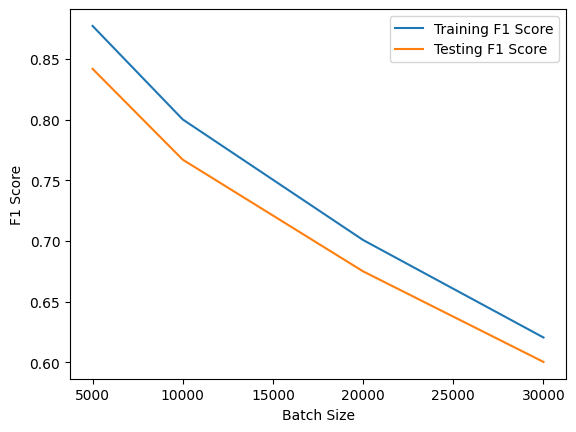

In [ ]:
# Plotting the learning curve
plt.plot(batch_sizes, train_scores_f1, label='Training F1 Score')
plt.plot(batch_sizes, test_scores_f1, label='Testing F1 Score')
plt.xlabel('Batch Size')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

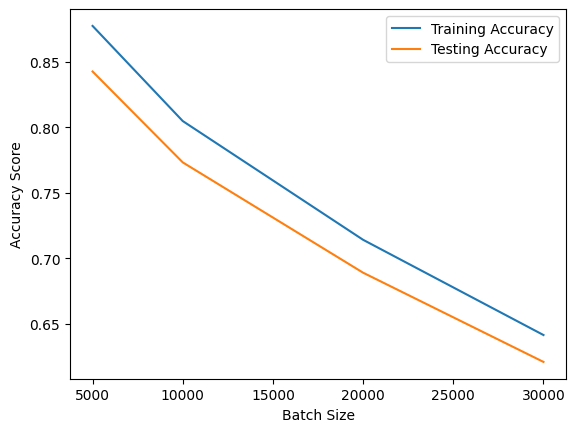

In [ ]:
# Plotting the learning curve
plt.plot(batch_sizes, train_scores_acc, label='Training Accuracy')
plt.plot(batch_sizes, test_scores_acc, label='Testing Accuracy')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [ ]:
# Concatenate all the predictions and the true labels for the testing set
pred_bottom_test = np.concatenate(np.array([pred_bottom_test]))
true_bottom_test = np.concatenate(np.array([true_bottom_test]))

# Calculate the weighted F1 score for each category on the testing set
weighted_f1_bottom_test = f1_score(true_bottom_test, pred_bottom_test, average='weighted')

# Concatenate all the predictions and the true labels for the training set
pred_bottom_train = np.concatenate(np.array([pred_bottom_train]))
true_bottom_train = np.concatenate(np.array([true_bottom_train]))

# Calculate the weighted F1 score for each category on the training set
weighted_f1_bottom_train = f1_score(true_bottom_train, pred_bottom_train, average='weighted')

print("Weighted F1 Score - Bottom Category (Training Data):", weighted_f1_bottom_train)
print("Weighted F1 Score - Bottom Category (Testing Data):", weighted_f1_bottom_test)

Weighted F1 Score - Bottom Category (Training Data): 0.6203905636275778
Weighted F1 Score - Bottom Category (Testing Data): 0.6002476922818597


Implementing logistic regression on different batches for "top_category_id":

In [ ]:
top_train_scores_acc = []
top_test_scores_acc = []
top_train_scores_f1 = []
top_test_scores_f1 = []
batch_sizes = [5000, 10000, 20000, 30000]

# Iterate over different batch sizes
for batch_size in batch_sizes:

    # Run the code block for the current batch size
    pred_top_train = []
    pred_top_test = []
    true_top_train = []
    true_top_test = []

    # Create TfidfVectorizer object
    vectorizer = TfidfVectorizer()

    # Instantiate the StandardScaler
    scaler = MinMaxScaler()

    # Set the number of features to select
    k = 1000

    # Iterate over data in batches
    for i in range(0, len(parquet_train_df), batch_size):

        # Get batch data
        batch = parquet_train_df.iloc[i:i+batch_size]

        # Fit and transform the text data
        X = vectorizer.fit_transform(batch["title_processed"].swifter.apply(lambda word: ' '.join(word)))

        # Standardize the data
        X = scaler.fit_transform(X.toarray())

        # Apply feature selection
        selector = SelectKBest(chi2, k=k)
        X = selector.fit_transform(X, batch["top_category_id"])

        # Split the data into training and testing sets
        X_train, X_test, y_train_top, y_test_top = train_test_split(X, batch["top_category_id"], test_size=0.2, random_state=42)

        # Train the model on the training set
        clf_top = LogisticRegression(max_iter=1000, penalty='l2', C=0.2)
        clf_top.fit(X_train, y_train_top)

        # Predict on the training set for the current batch
        y_pred_top_train = clf_top.predict(X_train)

        # Append the predicted values to the corresponding list for the training set
        pred_top_train.extend(y_pred_top_train)

        # Append the true values to the corresponding list for the training set
        true_top_train.extend(y_train_top)

        # Predict on the testing set for the current batch
        y_pred_top_test = clf_top.predict(X_test)

        # Append the predicted values to the corresponding list for the testing set
        pred_top_test.extend(y_pred_top_test)

        # Append the true values to the corresponding list for the testing set
        true_top_test.extend(y_test_top)

    # Compute accuracy and F1 scores for the training and testing sets
    top_train_accuracy = accuracy_score(true_top_train, pred_top_train)
    top_test_accuracy = accuracy_score(true_top_test, pred_top_test)
    top_train_f1 = f1_score(true_top_train, pred_top_train, average='weighted')
    top_test_f1 = f1_score(true_top_test, pred_top_test, average='weighted')

    # Append the accuracy and F1 scores to the respective lists
    top_train_scores_acc.append(top_train_accuracy)
    top_test_scores_acc.append(top_test_accuracy)
    top_train_scores_f1.append(top_train_f1)
    top_test_scores_f1.append(top_test_f1)



Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4932 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9932 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9932 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/29932 [00:00<?, ?it/s]

In [ ]:
# Concatenate all the predictions and the true labels for the testing set
pred_top_test = np.concatenate(np.array([pred_top_test]))
true_top_test = np.concatenate(np.array([true_top_test]))

# Calculate the weighted F1 score for each category on the testing set
weighted_f1_top_test = f1_score(true_top_test, pred_top_test, average='weighted')

# Concatenate all the predictions and the true labels for the training set
pred_top_train = np.concatenate(np.array([pred_top_train]))
true_top_train = np.concatenate(np.array([true_top_train]))

# Calculate the weighted F1 score for each category on the testing set
weighted_f1_top_train = f1_score(true_top_train, pred_top_train, average='weighted')

print("Weighted F1 Score - Top Category (Training Data):", weighted_f1_top_train)
print("Weighted F1 Score - Top Category (Testing Data):", weighted_f1_top_test)

Weighted F1 Score - Top Category (Training Data): 0.7651400215869213
Weighted F1 Score - Top Category (Testing Data): 0.7566673034532655


Plotting the learning curve for "top_category_id":

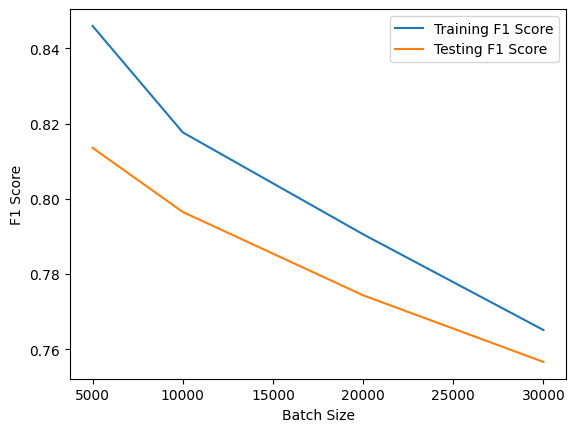

In [ ]:
# Plot the learning curve
plt.plot(batch_sizes, top_train_scores_f1, label='Training F1 Score')
plt.plot(batch_sizes, top_test_scores_f1, label='Testing F1 Score')
plt.xlabel('Batch Size')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

Implementing logistic regression on different batches for "color_id":

In [ ]:
color_train_scores_acc = []
color_test_scores_acc = []
color_train_scores_f1 = []
color_test_scores_f1 = []
batch_sizes = [5000, 10000, 20000, 30000]

# Iterate over different batch sizes
for batch_size in batch_sizes:

    # Run the code block for the current batch size
    pred_color_train = []
    pred_color_test = []
    true_color_train = []
    true_color_test = []

    # Create TfidfVectorizer object
    vectorizer = TfidfVectorizer()

    # Instantiate the StandardScaler
    scaler = MinMaxScaler()

    # Set the number of features to select
    k = 1000

    # Iterate over data in batches
    for i in range(0, len(parquet_train_df), batch_size):

        # Get batch data
        batch = parquet_train_df.iloc[i:i+batch_size]

        # Fit and transform the text data
        X = vectorizer.fit_transform(batch["title_processed"].swifter.apply(lambda word: ' '.join(word)))

        # Standardize the data
        X = scaler.fit_transform(X.toarray())

        # Apply feature selection
        selector = SelectKBest(chi2, k=k)
        X = selector.fit_transform(X, batch["color_id"])

        # Split the data into training and testing sets
        X_train, X_test, y_train_color, y_test_color = train_test_split(X, batch["color_id"], test_size=0.2, random_state=42)

        # Train the model on the training set
        clf_color = LogisticRegression(max_iter=1000, penalty='l2', C=0.2)
        clf_color.fit(X_train, y_train_color)

        # Predict on the training set for the current batch
        y_pred_color_train = clf_color.predict(X_train)

        # Append the predicted values to the corresponding list for the training set
        pred_color_train.extend(y_pred_color_train)

        # Append the true values to the corresponding list for the training set
        true_color_train.extend(y_train_color)

        # Predict on the testing set for the current batch
        y_pred_color_test = clf_color.predict(X_test)

        # Append the predicted values to the corresponding list for the testing set
        pred_color_test.extend(y_pred_color_test)

        # Append the true values to the corresponding list for the testing set
        true_color_test.extend(y_test_color)

    # Compute accuracy and F1 scores for the training and testing sets
    color_train_accuracy = accuracy_score(true_color_train, pred_color_train)
    color_test_accuracy = accuracy_score(true_color_test, pred_color_test)
    color_train_f1 = f1_score(true_color_train, pred_color_train, average='weighted')
    color_test_f1 = f1_score(true_color_test, pred_color_test, average='weighted')

    # Append the accuracy and F1 scores to the respective lists
    color_train_scores_acc.append(color_train_accuracy)
    color_test_scores_acc.append(color_test_accuracy)
    color_train_scores_f1.append(color_train_f1)
    color_test_scores_f1.append(color_test_f1)

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4932 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9932 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9932 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/29932 [00:00<?, ?it/s]

In [ ]:
# Concatenate all the predictions and the true labels for the testing set
pred_color_test = np.concatenate(np.array([pred_color_test]))
true_color_test = np.concatenate(np.array([true_color_test]))

# Calculate the weighted F1 score for each category on the testing set
weighted_f1_color_test = f1_score(true_color_test, pred_color_test, average='weighted')

# Concatenate all the predictions and the true labels for the training set
pred_color_train = np.concatenate(np.array([pred_color_train]))
true_color_train = np.concatenate(np.array([true_color_train]))

# Calculate the weighted F1 score for each category on the training set
weighted_f1_color_train = f1_score(true_color_train, pred_color_train, average='weighted')

print("Weighted F1 Score - Color (Training Data):", weighted_f1_color_train)
print("Weighted F1 Score - Color (Testing Data):", weighted_f1_color_test)

Weighted F1 Score - Color (Training Data): 0.46599592627919634
Weighted F1 Score - Color (Testing Data): 0.4529196525193649


Plotting the learning curve for "color_id":

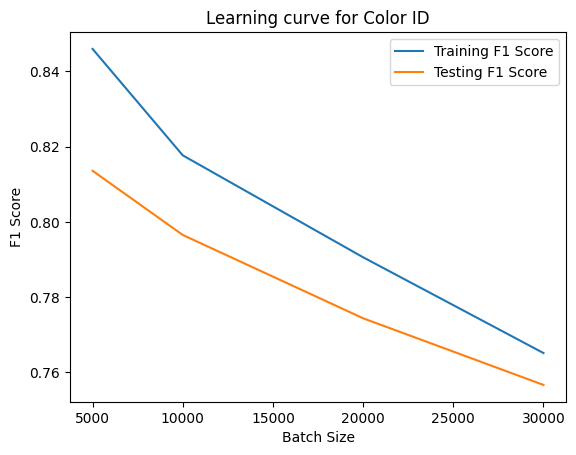

In [ ]:
# Plot the learning curve
plt.plot(batch_sizes, color_train_scores_f1, label='Training F1 Score')
plt.plot(batch_sizes, color_test_scores_f1, label='Testing F1 Score')
plt.xlabel('Batch Size')
plt.ylabel('F1 Score')
plt.title('Learning curve for Color ID')
plt.legend()
plt.show()

## Learning curves for logistic regression:

Plotting the learning curve for "bottom_category_id":

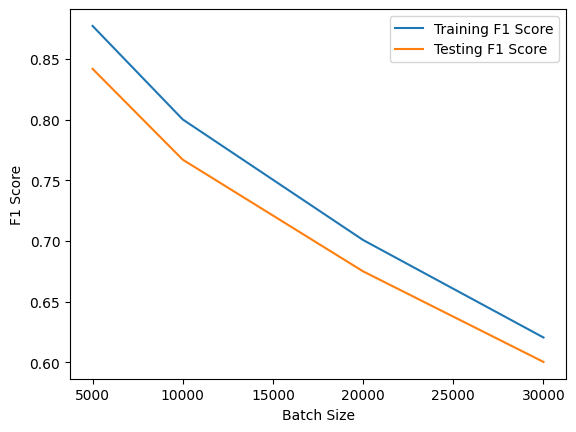

In [ ]:
# Plotting the learning curve
plt.plot(batch_sizes, train_scores_f1, label='Training F1 Score')
plt.plot(batch_sizes, test_scores_f1, label='Testing F1 Score')
plt.xlabel('Batch Size')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

Plotting the learning curve for "top_category_id":

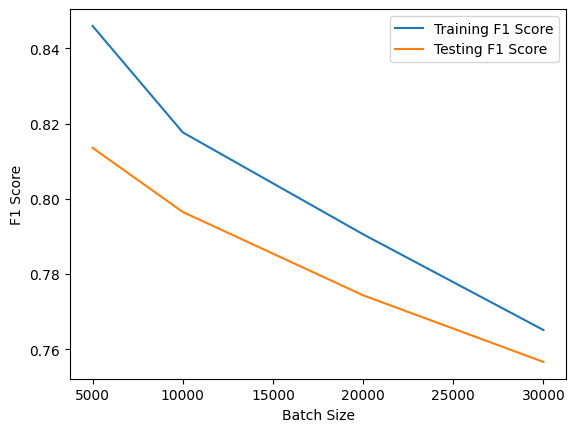

In [ ]:
# Plot the learning curve
plt.plot(batch_sizes, top_train_scores_f1, label='Training F1 Score')
plt.plot(batch_sizes, top_test_scores_f1, label='Testing F1 Score')
plt.xlabel('Batch Size')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

Plotting the learning curve for "color_id":

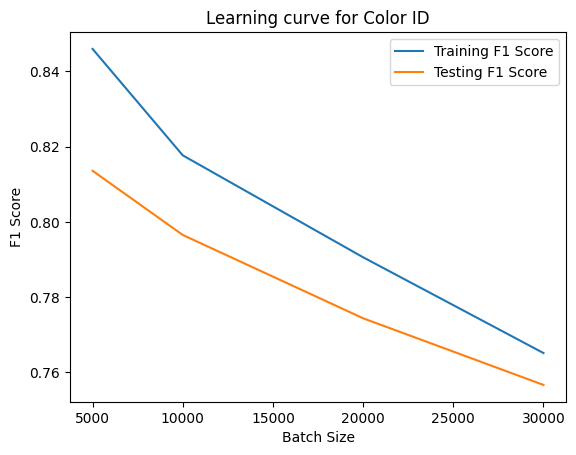

In [ ]:
# Plot the learning curve
plt.plot(batch_sizes, color_train_scores_f1, label='Training F1 Score')
plt.plot(batch_sizes, color_test_scores_f1, label='Testing F1 Score')
plt.xlabel('Batch Size')
plt.ylabel('F1 Score')
plt.title('Learning curve for Color ID')
plt.legend()
plt.show()

## Final logistic regression with batches of 10k and it's results

Implementing logistic regression on a batch of 10k for "bottom_category_id":

In [ ]:
pred_bottom_train = []
pred_bottom_test = []
true_bottom_train = []
true_bottom_test = []

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=10000)

# Instantiate the StandardScaler
scaler = MinMaxScaler()

# Set the number of features to select
k = 1000

# Define batch size
batch_size = 10000

# Iterate over data in batches
for i in range(0, len(parquet_train_df), batch_size):

    # Get batch data
    batch = parquet_train_df.iloc[i:i+batch_size]

    # Fit and transform the text data
    X = vectorizer.fit_transform(batch["title_processed"].swifter.apply(lambda word: ' '.join(word)))

    # Standardize the data
    X = scaler.fit_transform(X.toarray())

    # Apply feature selection
    selector = SelectKBest(chi2, k=k)
    X = selector.fit_transform(X, batch["bottom_category_id"])

    # Split the data into training and testing sets
    X_train, X_test, y_train_bottom, y_test_bottom = train_test_split(X, batch["bottom_category_id"], test_size=0.2, random_state=42)

    # Train the model on the training set
    clf_bottom = LogisticRegression(max_iter=1000, penalty='l2', C=0.2)
    clf_bottom.fit(X_train, y_train_bottom)

    # Predict on the training set for the current batch
    y_pred_bottom_train = clf_bottom.predict(X_train)

    # Append the predicted values to the corresponding list for the training set
    pred_bottom_train.extend(y_pred_bottom_train)

    # Append the true values to the corresponding list for the training set
    true_bottom_train.extend(y_train_bottom)

    # Predict on the testing set for the current batch
    y_pred_bottom_test = clf_bottom.predict(X_test)

    # Append the predicted values to the corresponding list for the testing set
    pred_bottom_test.extend(y_pred_bottom_test)

    # Append the true values to the corresponding list for the testing set
    true_bottom_test.extend(y_test_bottom)

# Compute overall accuracy and F1 scores for the training and testing sets
bottom_train_accuracy = accuracy_score(true_bottom_train, pred_bottom_train)
bottom_test_accuracy = accuracy_score(true_bottom_test, pred_bottom_test)
bottom_train_f1 = f1_score(true_bottom_train, pred_bottom_train, average='weighted')
bottom_test_f1 = f1_score(true_bottom_test, pred_bottom_test, average='weighted')

print("Overall train F1 score for bottom category id:", bottom_train_f1)
print("Overall testing F1 score for bottom category id:", bottom_test_f1)

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9932 [00:00<?, ?it/s]

Overall train F1 score for bottom category id: 0.8001978054390989
Overall testing F1 score for bottom category id: 0.7677497315567026


Implementing logistic regression on a batch of 10k for "top_category_id":

In [ ]:
pred_top_train = []
pred_top_test = []
true_top_train = []
true_top_test = []

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=10000)

# Instantiate the StandardScaler
scaler = MinMaxScaler()

# Set the number of features to select
k = 1000

# Define batch size
batch_size = 10000

# Iterate over data in batches
for i in range(0, len(parquet_train_df), batch_size):

    # Get batch data
    batch = parquet_train_df.iloc[i:i+batch_size]

    # Fit and transform the text data
    X = vectorizer.fit_transform(batch["title_processed"].swifter.apply(lambda word: ' '.join(word)))

    # Standardize the data
    X = scaler.fit_transform(X.toarray())

    # Apply feature selection
    selector = SelectKBest(chi2, k=k)
    X = selector.fit_transform(X, batch["top_category_id"])

    # Split the data into training and testing sets
    X_train, X_test, y_train_top, y_test_top = train_test_split(X, batch["top_category_id"], test_size=0.2, random_state=42)

    # Train the model on the training set
    clf_top = LogisticRegression(max_iter=1000, penalty='l2', C=0.2)
    clf_top.fit(X_train, y_train_top)

    # Predict on the training set for the current batch
    y_pred_top_train = clf_top.predict(X_train)

    # Append the predicted values to the corresponding list for the training set
    pred_top_train.extend(y_pred_top_train)

    # Append the true values to the corresponding list for the training set
    true_top_train.extend(y_train_top)

    # Predict on the testing set for the current batch
    y_pred_top_test = clf_top.predict(X_test)

    # Append the predicted values to the corresponding list for the testing set
    pred_top_test.extend(y_pred_top_test)

    # Append the true values to the corresponding list for the testing set
    true_top_test.extend(y_test_top)

# Compute overall accuracy and F1 scores for the training and testing sets
top_train_accuracy = accuracy_score(true_top_train, pred_top_train)
top_test_accuracy = accuracy_score(true_top_test, pred_top_test)
top_train_f1 = f1_score(true_top_train, pred_top_train, average='weighted')
top_test_f1 = f1_score(true_top_test, pred_top_test, average='weighted')

print("Overall train F1 score for top category id:", top_train_f1)
print("Overall testing F1 score for top category id:", top_test_f1)

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9932 [00:00<?, ?it/s]

Overall train F1 score for top category id: 0.8186320792843974
Overall testing F1 score for top category id: 0.7973269489631711


Implementing logistic regression on a batch of 10k for "color_id":

In [ ]:
pred_color_train = []
pred_color_test = []
true_color_train = []
true_color_test = []

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=10000)

# Instantiate the StandardScaler
scaler = MinMaxScaler()

# Set the number of features to select
k = 1000

# Define batch size
batch_size = 10000

# Iterate over data in batches
for i in range(0, len(parquet_train_df), batch_size):

    # Get batch data
    batch = parquet_train_df.iloc[i:i+batch_size]

    # Fit and transform the text data
    X = vectorizer.fit_transform(batch["title_processed"].swifter.apply(lambda word: ' '.join(word)))

    # Standardize the data
    X = scaler.fit_transform(X.toarray())

    # Apply feature selection
    selector = SelectKBest(chi2, k=k)
    X = selector.fit_transform(X, batch["color_id"])

    # Split the data into training and testing sets
    X_train, X_test, y_train_color, y_test_color = train_test_split(X, batch["color_id"], test_size=0.2, random_state=42)

    # Train the model on the training set
    clf_color = LogisticRegression(max_iter=1000, penalty='l2', C=0.2)
    clf_color.fit(X_train, y_train_color)

    # Predict on the training set for the current batch
    y_pred_color_train = clf_color.predict(X_train)

    # Append the predicted values to the corresponding list for the training set
    pred_color_train.extend(y_pred_color_train)

    # Append the true values to the corresponding list for the training set
    true_color_train.extend(y_train_color)

    # Predict on the testing set for the current batch
    y_pred_color_test = clf_color.predict(X_test)

    # Append the predicted values to the corresponding list for the testing set
    pred_color_test.extend(y_pred_color_test)

    # Append the true values to the corresponding list for the testing set
    true_color_test.extend(y_test_color)

# Compute overall accuracy and F1 scores for the training and testing sets
color_train_accuracy = accuracy_score(true_color_train, pred_color_train)
color_test_accuracy = accuracy_score(true_color_test, pred_color_test)
color_train_f1 = f1_score(true_color_train, pred_color_train, average='weighted')
color_test_f1 = f1_score(true_color_test, pred_color_test, average='weighted')

print("Overall train F1 score for color category id:", color_train_f1)
print("Overall testing F1 score for color category id:", color_test_f1)

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/10000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/9932 [00:00<?, ?it/s]

Overall train F1 score for color category id: 0.4621105440215314
Overall testing F1 score for color category id: 0.4354018771379832


# Results table for all the models

The below table shows the comparison of the best results in between all the models (as mentioned in the report)

| Model Name          | Data Type | Bottom Category | Top Category | Color   |
|---------------------|-----------|----------------|--------------|---------|
| Multinomial NB      | Train     | 96.76%         | 83.93%       | 56.76% |
|                     | Validation| 72.47%         | 69.87%       | 26.56% |
| Random Forest       | Train     | 88.94%         | 74.19%       | 60.42% |
|                     | Validation| 71.28%         | 67.30%       | 45.26% |
| Logistic Regression | Train     | 80.02%         | 81.76%       | 46.00% |
|                     | Validation| 76.70%         | 79.65%       | 43.49% |


# Connecting the Google drive to Colab and importing the Etsy test data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls /content/drive/MyDrive/ML-assignment/etsy_data

cleaned_parquet_train_df.parquet  parquet_train_df.parquet
data				  processed_parquet_train_df.parquet


In [ ]:
parquet_filenames_test = !ls /content/drive/MyDrive/ML-assignment/etsy_data/data/parquet/test/*

In [ ]:
len(parquet_filenames_test)

278

In [ ]:
parquet_filenames_test[-3:]

['/content/drive/MyDrive/ML-assignment/etsy_data/data/parquet/test/part-00275-of-00278.parquet',
 '/content/drive/MyDrive/ML-assignment/etsy_data/data/parquet/test/part-00276-of-00278.parquet',
 '/content/drive/MyDrive/ML-assignment/etsy_data/data/parquet/test/part-00277-of-00278.parquet']

# Exploratory Data Analysis on test data

In [ ]:
# Looping through each file and storing it's contents in an empty dataframe
parquet_test_dfs = []
for file in parquet_filenames_test:
    parquet_test_file = pq.read_table(file).to_pandas()
    parquet_test_dfs.append(parquet_test_file)

# Appending all the list of DataFrames into a single DataFrame
parquet_test_df = pd.concat(parquet_test_dfs, ignore_index=True)

In [ ]:
# Viewing Shape, First and Last Five Observations of the parquet test dataframe.
print(parquet_test_df.shape)
print(parquet_test_df.head())
print(parquet_test_df.tail())

(27119, 15)
   product_id                                              title  \
0  1323824090  12 Small Pressed Reddish-Orange Japanese Maple...   
1   544175230  Christmas artificial leaves, Holiday decor, Gl...   
2   895779370  Fresh Holly Leaves ( 50 count) - Christmas Gre...   
3   641102090  Christmas artificial greenery, Gold plants, Gl...   
4  1340603160  Red crown of thorn corona thai Hybrid sale Cut...   

                                         description  \
0  12 small pressed reddish-orange Japanese maple...   
1  Glitter fake leaves.\nPrice for 5 leaves \nLea...   
2  This listing includes 50 fresh HOLLY Leaves Fr...   
3  Glitter pine stems.\nPrice for 1 branch\nThe t...   
4                                      Free shipping   

                                                tags      type  room  \
0  Leaves,Art,Crafts,Paper crafts,Fall,Soap,Bookm...  physical  None   
1  Holiday decor,Glitter fake leaves,Faux greener...  physical  None   
2  lucky Holly leaves,Chri

In [ ]:
# Viewing Columns and its Types of the parquet test dataframe.
parquet_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27119 entries, 0 to 27118
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   27119 non-null  int64 
 1   title        27008 non-null  object
 2   description  27008 non-null  object
 3   tags         23232 non-null  object
 4   type         26975 non-null  object
 5   room         958 non-null    object
 6   craft_type   3606 non-null   object
 7   recipient    1478 non-null   object
 8   material     2341 non-null   object
 9   occasion     5766 non-null   object
 10  holiday      4546 non-null   object
 11  art_subject  278 non-null    object
 12  style        1878 non-null   object
 13  shape        302 non-null    object
 14  pattern      1170 non-null   object
dtypes: int64(1), object(14)
memory usage: 3.1+ MB


In [ ]:
# Basic Descriptive Statistics of the parquet test dataframe.
parquet_test_df.describe()

,product_id
count,2.711900e+04
mean,1.005974e+09
std,3.097457e+08
min,9.404400e+06
25%,7.715121e+08
50%,1.079405e+09
75%,1.272200e+09
max,1.393235e+09


In [ ]:
# Null Check on current columns of the parquet test dataframe.
parquet_test_df.isnull().sum()

product_id         0
title            111
description      111
tags            3887
type             144
room           26161
craft_type     23513
recipient      25641
material       24778
occasion       21353
holiday        22573
art_subject    26841
style          25241
shape          26817
pattern        25949
dtype: int64

In [ ]:
# Percentage of all Missing Data Columns in the testing dataframe
parquetNullPercent = (parquet_test_df.isnull().sum()/len(parquet_test_df)) * 100
parquetNullPercent

product_id      0.000000
title           0.409307
description     0.409307
tags           14.333124
type            0.530993
room           96.467421
craft_type     86.703050
recipient      94.549947
material       91.367676
occasion       78.738154
holiday        83.236845
art_subject    98.974888
style          93.074966
shape          98.886390
pattern        95.685682
dtype: float64

In [ ]:
# Dropping columns with high null values (over 70%)
parquet_test_df = parquet_test_df.drop(['room', 'craft_type', 'recipient', 'material', 'occasion', 'holiday', 'art_subject', 'style', 'shape', 'pattern'], axis = 1)

In [ ]:
# Percentage of all Missing Data Columns in the training dataframe after dropping irrelavant columns
parquetNullPercent = (parquet_test_df.isnull().sum()/len(parquet_test_df)) * 100
parquetNullPercent

product_id      0.000000
title           0.409307
description     0.409307
tags           14.333124
type            0.530993
dtype: float64

In [ ]:
parquet_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27119 entries, 0 to 27118
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   27119 non-null  int64 
 1   title        27008 non-null  object
 2   description  27008 non-null  object
 3   tags         23232 non-null  object
 4   type         26975 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [ ]:
print(parquet_test_df['title'].isnull().sum())

111


111 is the total number of rows having no "title". The title column is going to be used for our final model and these missing values might affect the result of the model negatively. As the missing data value percentage is very small (0.4%), it's best to remove the null values instead of imputing them.

In [ ]:
parquet_test_df.dropna(subset=['title'], inplace=True)

In [ ]:
print(parquet_test_df.shape)
print(parquet_test_df.info())
print(parquet_test_df.describe())
print(parquet_test_df.head())
print(parquet_test_df.isnull().sum())

(27008, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27008 entries, 0 to 27118
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   27008 non-null  int64 
 1   title        27008 non-null  object
 2   description  27008 non-null  object
 3   tags         23232 non-null  object
 4   type         26864 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB
None
         product_id
count  2.700800e+04
mean   1.006214e+09
std    3.098421e+08
min    9.404400e+06
25%    7.724319e+08
50%    1.079873e+09
75%    1.272329e+09
max    1.393235e+09
   product_id                                              title  \
0  1323824090  12 Small Pressed Reddish-Orange Japanese Maple...   
1   544175230  Christmas artificial leaves, Holiday decor, Gl...   
2   895779370  Fresh Holly Leaves ( 50 count) - Christmas Gre...   
3   641102090  Christmas artificial greenery, Gold plants, Gl...   
4  1340603160  Red 

## Preprocessing on test data


We will apply all the preprocessing on the "title" column as we will only be using this column for our prediction. In a case where we are using different columns, we will need to clean and preprocess it

We will call all the functions defined while preprocessing the train data and clean the 'title' column of our test data

In [ ]:
# Converting all the titles to lowercase
parquet_test_df['title_processed'] = parquet_test_df['title'].swifter.apply(lowercase_text)

Pandas Apply:   0%|          | 0/27008 [00:00<?, ?it/s]

In [ ]:
# Removing special characters from the title
parquet_test_df['title_processed'] = parquet_test_df['title_processed'].swifter.apply(remove_special_characters)

Pandas Apply:   0%|          | 0/27008 [00:00<?, ?it/s]

In [ ]:
# Removing urls from the title
parquet_test_df['title_processed'] = parquet_test_df['title_processed'].swifter.apply(remove_urls)

Pandas Apply:   0%|          | 0/27008 [00:00<?, ?it/s]

In [ ]:
# Removing emojis from the title
parquet_test_df['title_processed'] = parquet_test_df['title_processed'].swifter.apply(remove_emojis)

Pandas Apply:   0%|          | 0/27008 [00:00<?, ?it/s]

In [ ]:
# Removing stop words from the title
parquet_test_df['title_processed'] = parquet_test_df['title_processed'].swifter.apply(remove_stop_words)

Pandas Apply:   0%|          | 0/27008 [00:00<?, ?it/s]

In [ ]:
# Removing digits (0-9) from the title
parquet_test_df['title_processed'] = parquet_test_df['title_processed'].swifter.apply(lambda x: re.sub(r'\d+', ' ', x))

Pandas Apply:   0%|          | 0/27008 [00:00<?, ?it/s]

In [ ]:
# Tokenizing the title
parquet_test_df['title_processed'] = parquet_test_df['title_processed'].swifter.apply(lambda x: tokenize_text(x))

Pandas Apply:   0%|          | 0/27008 [00:00<?, ?it/s]

In [ ]:
# Lemmatizing the title
parquet_test_df['title_processed'] = parquet_test_df['title_processed'].swifter.apply(lemmatize_tokens)

Pandas Apply:   0%|          | 0/27008 [00:00<?, ?it/s]

In [ ]:
parquet_test_df.head()

,product_id,title,description,tags,type,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern,title_processed
0,1323824090,12 Small Pressed Reddish-Orange Japanese Maple...,12 small pressed reddish-orange Japanese maple...,"Leaves,Art,Crafts,Paper crafts,Fall,Soap,Bookm...",physical,None,floral arranging,None,None,None,None,None,None,None,None,"[small, pressed, reddish, orange, japanese, ma..."
1,544175230,"Christmas artificial leaves, Holiday decor, Gl...",Glitter fake leaves.\nPrice for 5 leaves \nLea...,"Holiday decor,Glitter fake leaves,Faux greener...",physical,None,floral arranging,None,None,None,None,None,None,None,None,"[christmas, artificial, leaf, holiday, decor, ..."
2,895779370,Fresh Holly Leaves ( 50 count) - Christmas Gre...,This listing includes 50 fresh HOLLY Leaves Fr...,"lucky Holly leaves,Christmas Greenery,Christma...",physical,None,floral arranging,None,None,None,None,None,None,None,None,"[fresh, holly, leaf, count, christmas, greenery]"
3,641102090,"Christmas artificial greenery, Gold plants, Gl...",Glitter pine stems.\nPrice for 1 branch\nThe t...,"Glitter pine stems,Holiday decor,Christmas Cra...",physical,None,floral arranging,None,None,None,None,None,None,None,None,"[christmas, artificial, greenery, gold, plant,..."
4,1340603160,Red crown of thorn corona thai Hybrid sale Cut...,Free shipping,"cactus live plant,Crown of thorns",physical,None,None,None,None,None,None,None,None,None,None,"[red, crown, thorn, corona, thai, hybrid, sale..."


In [ ]:
parquet_test_df = parquet_test_df.drop(['title', 'description', 'tags', 'type'], axis = 1)

In [ ]:
# dummy values
parquet_test_df["top_category_id"] = np.zeros(len(parquet_test_df), dtype=int)
parquet_test_df["bottom_category_id"] = np.zeros(len(parquet_test_df), dtype=int)
parquet_test_df["color_id"] = np.zeros(len(parquet_test_df), dtype=int)

In [ ]:
parquet_test_df.head()

,product_id,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern,title_processed,top_category_id,bottom_category_id,color_id
0,1323824090,None,floral arranging,None,None,None,None,None,None,None,None,"[small, pressed, reddish, orange, japanese, ma...",0,0,0
1,544175230,None,floral arranging,None,None,None,None,None,None,None,None,"[christmas, artificial, leaf, holiday, decor, ...",0,0,0
2,895779370,None,floral arranging,None,None,None,None,None,None,None,None,"[fresh, holly, leaf, count, christmas, greenery]",0,0,0
3,641102090,None,floral arranging,None,None,None,None,None,None,None,None,"[christmas, artificial, greenery, gold, plant,...",0,0,0
4,1340603160,None,None,None,None,None,None,None,None,None,None,"[red, crown, thorn, corona, thai, hybrid, sale...",0,0,0


In [ ]:
# creating a backup file for the processed test data
parquet_test_df.to_parquet('processed_parquet_test_df.parquet')

# Applying Logistic regression on the final test data

In [ ]:
parquet_test_df.head()

,product_id,room,craft_type,recipient,material,occasion,holiday,art_subject,style,shape,pattern,title_processed,top_category_id,bottom_category_id,color_id
0,1323824090,None,floral arranging,None,None,None,None,None,None,None,None,"[small, pressed, reddish, orange, japanese, ma...",0,0,0
1,544175230,None,floral arranging,None,None,None,None,None,None,None,None,"[christmas, artificial, leaf, holiday, decor, ...",0,0,0
2,895779370,None,floral arranging,None,None,None,None,None,None,None,None,"[fresh, holly, leaf, count, christmas, greenery]",0,0,0
3,641102090,None,floral arranging,None,None,None,None,None,None,None,None,"[christmas, artificial, greenery, gold, plant,...",0,0,0
4,1340603160,None,None,None,None,None,None,None,None,None,None,"[red, crown, thorn, corona, thai, hybrid, sale...",0,0,0


Here, we will be calling the Logistic regression model built for "bottom_category_id", "top_category_id", and "color_id" and predict the values for test data

In [ ]:
batch_size = 20000
n_batches = int(np.ceil(len(parquet_test_df) / batch_size))

top_category_pred = np.array([])
bottom_category_pred = np.array([])
color_id_pred = np.array([])

test_vectorizer = TfidfVectorizer(max_features=1000)

for i in range(n_batches):
    start = i * batch_size
    end = min(start + batch_size, len(parquet_test_df))

    batch = parquet_test_df.iloc[start:end]

    final_X_test = test_vectorizer.fit_transform(batch["title_processed"].swifter.apply(lambda word: ' '.join(word)))

    top_category_pred_batch = clf_top.predict(final_X_test)
    bottom_category_pred_batch = clf_bottom.predict(final_X_test)
    color_id_pred_batch = clf_color.predict(final_X_test)

    top_category_pred = np.concatenate([top_category_pred, top_category_pred_batch])
    bottom_category_pred = np.concatenate([bottom_category_pred, bottom_category_pred_batch])
    color_id_pred = np.concatenate([color_id_pred, color_id_pred_batch])

# making a new dataframe with all the predicted values
predictions_df = pd.DataFrame({
    "product_id": parquet_test_df["product_id"],
    "bottom_category_id": bottom_category_pred,
    "top_category_id": top_category_pred,
    "color_id": color_id_pred
})

Pandas Apply:   0%|          | 0/20000 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/7008 [00:00<?, ?it/s]

In [ ]:
predictions_df.head()

,product_id,bottom_category_id,top_category_id,color_id
0,1323824090,526.0,6.0,17.0
1,544175230,11276.0,8.0,19.0
2,895779370,1380.0,8.0,4.0
3,641102090,1275.0,8.0,19.0
4,1340603160,2896.0,6.0,17.0


# Exporting the final predicted data

In [ ]:
# export the final predicted test data
student_id = "22262858"
predictions_df[
    ["product_id", "top_category_id", "bottom_category_id", "color_id"]
].to_parquet(f"predictions_{student_id}.parquet")

predictions_df[
    ["product_id", "top_category_id", "bottom_category_id", "color_id"]
].to_csv(f"predictions_{student_id}.csv")